# regression lineaire

## Decription de la base de données

Le dataset contient des informations sur le prix de vente(**Price**) des maisons,revenu moyen par région(**Income**),le nombre de population(**Population**) de la ville où se trouve la maison,l'age(**House_Age**) de la maison,le nombre de chambre(**Number_Rooms**) dans la maison. Je vais faire une regression lineaire pour predire le prix de la maison en fonction des differents paramètres. Le dataset a été telechargé sur Kaggle à travers ce [lien](https://www.kaggle.com/datasets/vedavyasv/usa-housing). j'ai supprimé certaines variables et renommer d'autres pour ce projet.

In [1]:
# Importation des bibliothèques
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Importation du dataframe
df = pd.read_csv('USA_Housing2.csv')
df

,Unnamed: 0,Income,House_Age,Number_Rooms,Population,Price
0,0,79545.458574,5.682861,7.009188,23086.800503,1.059034e+06
1,1,79248.642455,6.002900,6.730821,40173.072174,1.505891e+06
2,2,61287.067179,5.865890,8.512727,36882.159400,1.058988e+06
3,3,63345.240046,7.188236,5.586729,34310.242831,1.260617e+06
4,4,59982.197226,5.040555,7.839388,26354.109472,6.309435e+05
...,...,...,...,...,...,...
4995,4995,60567.944140,7.830362,6.137356,22837.361035,1.060194e+06
4996,4996,78491.275435,6.999135,6.576763,25616.115489,1.482618e+06
4997,4997,63390.686886,7.250591,4.805081,33266.145490,1.030730e+06
4998,4998,68001.331235,5.534388,7.130144,42625.620156,1.198657e+06


## Nettoyage des données

In [3]:
# Suppression de la variable
df=df.drop("Unnamed: 0", axis=1)
df.head()

,Income,House_Age,Number_Rooms,Population,Price
0,79545.458574,5.682861,7.009188,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,26354.109472,6.309435e+05


In [4]:
# Detecction des valeurs manquantes

missing_values = df.isnull().sum()
#Calcul de la proportion des valeurs manquante
missing_percent = missing_values / len(df)
# creation d'un dataframe avec les nombres et proportion des valeurs manquantes
missing_df=pd.concat([missing_values,missing_percent],axis=1)
missing_df.columns=['Nombre de valeurs manquantes','Proportion de valeurs manquantes']

#Tri des variable par odre des proportion des valeurs manquantes
missing_df=missing_df.sort_values('Proportion de valeurs manquantes',ascending=False)
missing_df

,Nombre de valeurs manquantes,Proportion de valeurs manquantes
Income,0,0.0
House_Age,0,0.0
Number_Rooms,0,0.0
Population,0,0.0
Price,0,0.0


Il n'y a pas de de valeurs manquantes

In [5]:
#recherche de doublons

df.duplicated().sum()

0

Pas de valeurs doubles

In [6]:
# Detection des valeurs aberrantes

# Fonction pour detecter les valeurs abeerantes.
def detect_outliers(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - (1.5 * IQR)
    upper_limit = Q3 + (1.5 * IQR)
    outliers = data[(data[col] < lower_limit) | (data[col] > upper_limit)]
    
    if len(outliers) == 0:
        return 'No Outliers Present'
    else:
        return outliers

In [7]:
# Affichage des valeurs aberantes --

#Selection des variables numériques


for col in df.columns:
    print('-' * 27, col,'-' * 26)
    print(detect_outliers(df, col))
    print('\n')

--------------------------- Income --------------------------
             Income  House_Age  Number_Rooms    Population         Price
12     39033.809237   7.671755      7.250029  39220.361467  1.042814e+06
39     17796.631190   4.949557      6.713905  47162.183643  3.023558e+05
411    36100.444227   5.778489      5.497450  44901.857338  5.995040e+05
558    99629.013581   5.431863      7.351398  36950.739057  1.883481e+06
693   107701.748378   7.143522      8.518608  37619.439929  2.332111e+06
844    39411.652788   4.385845      7.047435  45851.398296  5.394834e+05
962   101928.858060   4.829586      9.039382  22804.991935  1.938866e+06
1096   97548.310413   5.460973      6.609396  39089.415712  2.026303e+06
1271   37971.207566   4.291224      5.807510  33267.767728  3.114052e+04
1459   35963.330809   3.438547      8.264122  24435.777302  1.430274e+05
1597   39294.036523   5.928585      5.960676  43183.516104  7.811375e+05
1734  104702.724257   5.575523      6.932106  22560.527135  1.

In [8]:
#Fonction pour afficher le nombre et proportion de valeur aberrantes
def proportion_of_outliers(data):
    outliers_info = {}  # Dictionnaire pour stocker le nombre et la proportion de valeurs aberrantes par colonne
    for column in df.columns:
        outliers = detect_outliers(data, column)
        total_rows = data.shape[0]
        num_outliers = len(outliers)

        if num_outliers == 0:
            proportion = 0
        else:
            proportion = num_outliers / total_rows

        outliers_info[column] = {'num_outliers': num_outliers, 'proportion': proportion}

    return outliers_info

In [9]:
#Affichage du nombre et proportion de valeur aberrantes

# Exemple d'utilisation

outliers_info = proportion_of_outliers(df)

# Affichage des résultats pour chaque variable
for column, info in outliers_info.items():
    print(f"Variable: {column}")
    print(f"Nombre de valeurs aberrantes: {info['num_outliers']}")
    print(f"Proportion de valeurs aberrantes: {info['proportion']:.2%}")
    print("-" * 30)

Variable: Income
Nombre de valeurs aberrantes: 32
Proportion de valeurs aberrantes: 0.64%
------------------------------
Variable: House_Age
Nombre de valeurs aberrantes: 25
Proportion de valeurs aberrantes: 0.50%
------------------------------
Variable: Number_Rooms
Nombre de valeurs aberrantes: 24
Proportion de valeurs aberrantes: 0.48%
------------------------------
Variable: Population
Nombre de valeurs aberrantes: 30
Proportion de valeurs aberrantes: 0.60%
------------------------------
Variable: Price
Nombre de valeurs aberrantes: 35
Proportion de valeurs aberrantes: 0.70%
------------------------------


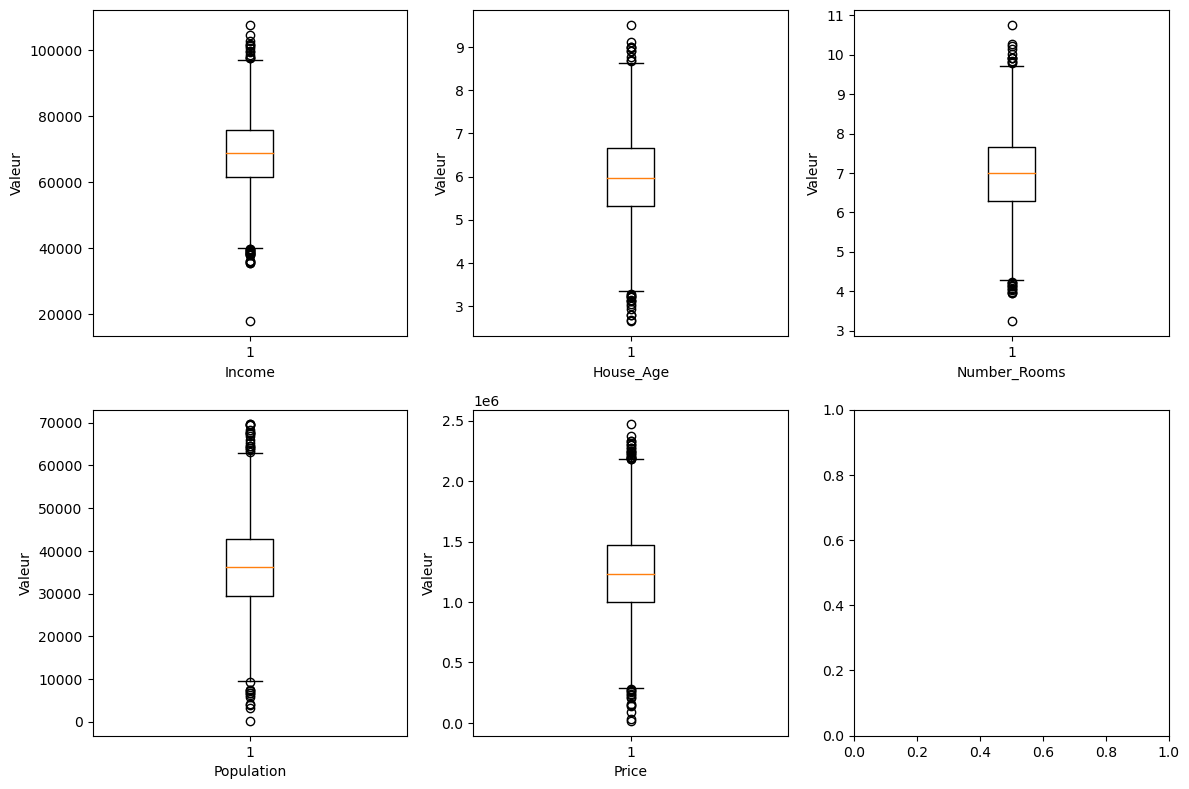

In [10]:
# Visualisation des valeurs aberrantes

# Création des subplots pour chaque variable quantitative sur une même figure
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))
axs = axs.flatten()
for i, var in enumerate(df.columns):
    axs[i].boxplot(df[var])
    axs[i].set_xlabel(var)
    axs[i].set_ylabel('Valeur')
plt.tight_layout()
plt.show()

Je vais faire les analyses sans supprimer les valeurs aberrantes

In [11]:
# Fonction pour supprimer les valeurs aberrantes
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - (1.5 * IQR)
    upper_limit = Q3 + (1.5 * IQR)
    
    # Filtrer les valeurs aberrantes
    df_no_outliers = df[(df[col] >= lower_limit) & (df[col] <= upper_limit)]
    
    if len(df_no_outliers) == len(df):
        return 'No Outliers Present'
    else:
        return df_no_outliers

In [12]:
# Utilisation de la fonction pour supprimer les valeurs aberrantes,df1 contiendra le DataFrame 
#original sans les valeurs aberrantes dans la colonne spécifiée
df2 = remove_outliers(df, 'Income')
df2 = remove_outliers(df2, 'House_Age')
df2 = remove_outliers(df2, 'Number_Rooms')
df2 = remove_outliers(df2, 'Population')
df2 = remove_outliers(df2, 'Price')

In [13]:
df2

,Income,House_Age,Number_Rooms,Population,Price
0,79545.458574,5.682861,7.009188,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,26354.109472,6.309435e+05
...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,22837.361035,1.060194e+06
4996,78491.275435,6.999135,6.576763,25616.115489,1.482618e+06
4997,63390.686886,7.250591,4.805081,33266.145490,1.030730e+06
4998,68001.331235,5.534388,7.130144,42625.620156,1.198657e+06


## Description des données

In [14]:
df2.describe()

,Income,House_Age,Number_Rooms,Population,Price
count,4856.000000,4856.000000,4856.000000,4856.000000,4.856000e+03
mean,68625.560074,5.977048,6.986715,36130.232690,1.232172e+06
std,10276.810515,0.965198,0.984273,9635.896488,3.368748e+05
min,40141.566477,3.342599,4.290194,9487.921585,3.042393e+05
25%,61601.923744,5.332633,6.305905,29462.806423,1.003686e+06
50%,68849.799341,5.970429,7.002506,36152.538438,1.232669e+06
75%,75710.119632,6.641258,7.661473,42769.535718,1.464977e+06
max,97112.361252,8.641821,9.710217,62963.755395,2.152959e+06


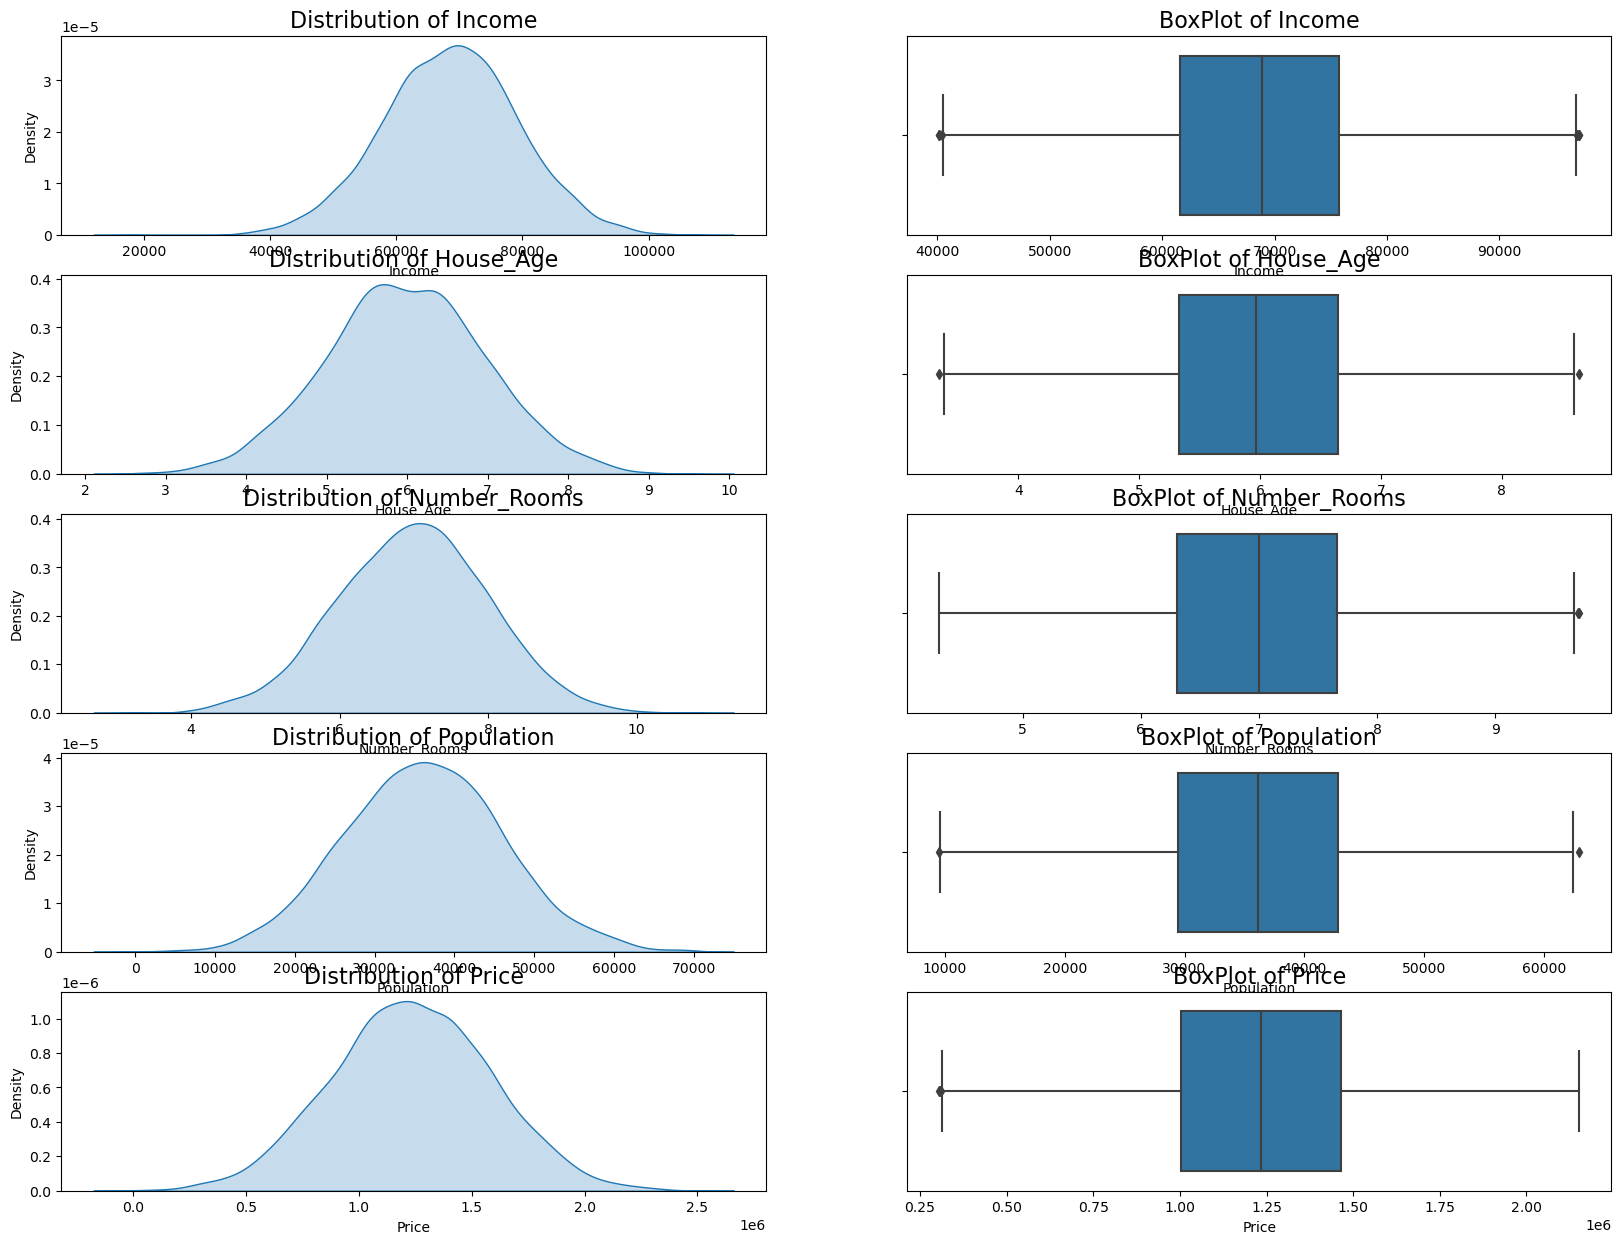

In [15]:
# Boxplot et kde
fig, axes = plt.subplots(5,2, figsize=(20,15))
idx = 0
for col in df2.columns:
    sns.kdeplot(data=df, x=col,fill=True , 
                ax=axes[idx][0]).set_title(f'Distribution of {col}', fontsize='16')
    sns.boxplot(data=df2, x=col ,
                ax=axes[idx][1]).set_title(f'BoxPlot of {col}', fontsize='16')
    idx +=1
plt.show()

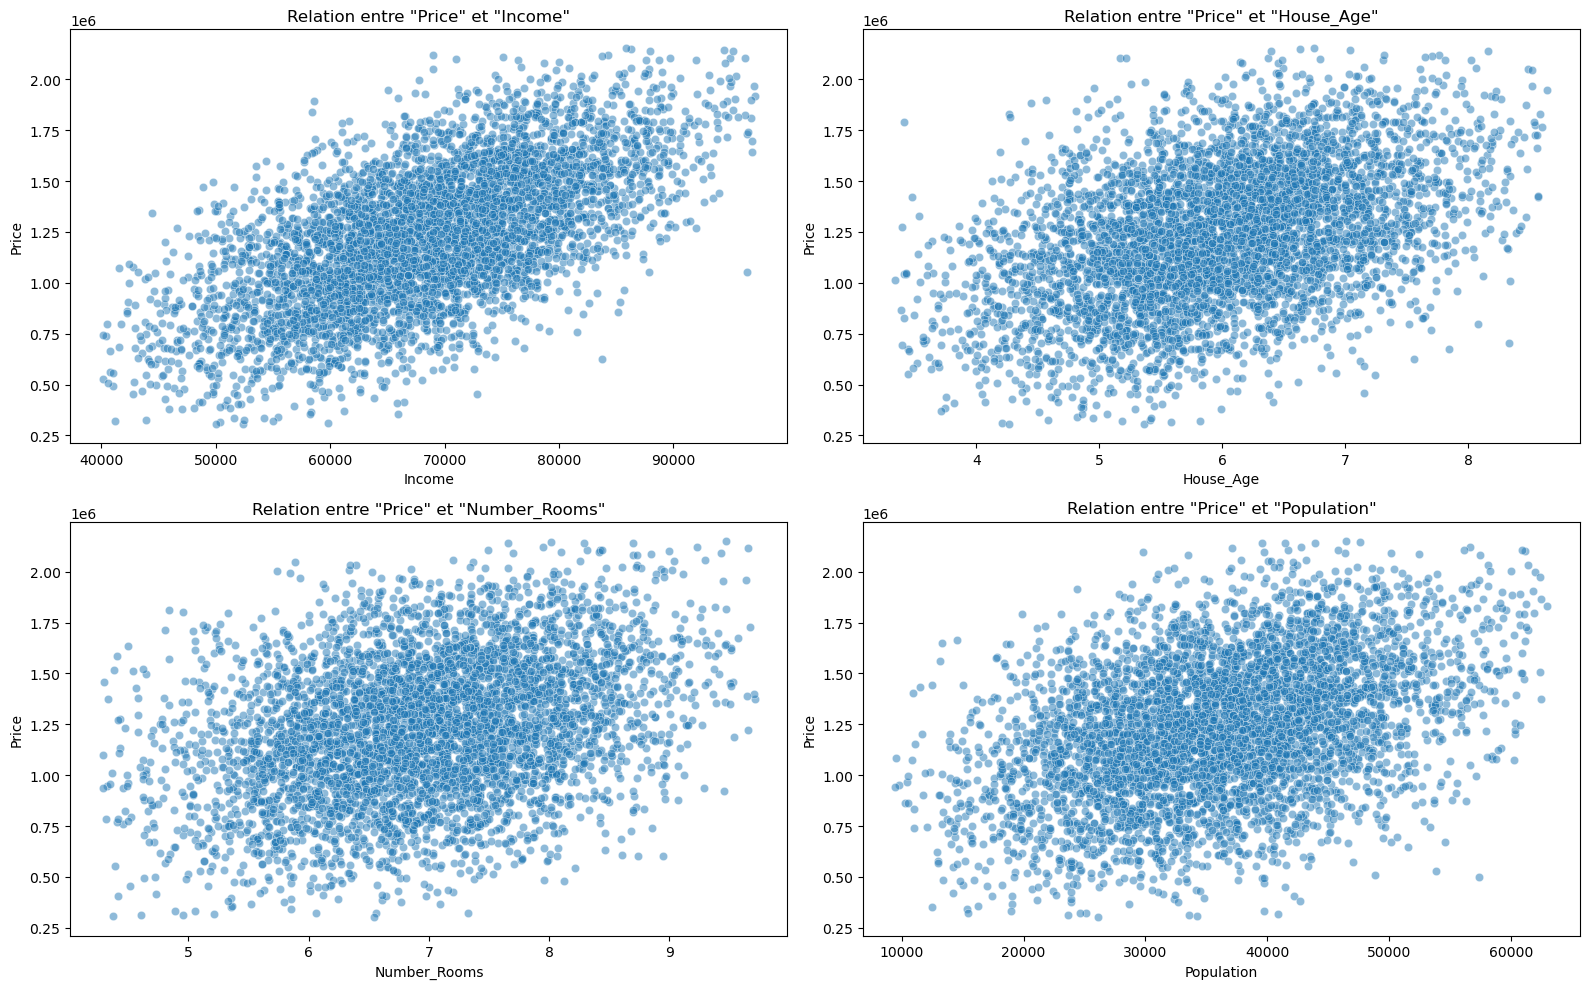

In [16]:
#Relation entre la variable cible et les variables numériques

# Sélection des variables numériques
num_vars = df2.select_dtypes(include=np.number).drop(columns=['Price']).columns

# Calcul de la taille de la matrice des subplots en fonction du nombre de variables numériques
n_cols = 2
n_rows = int(np.ceil(len(num_vars) / n_cols))

# Affichage des scatterplots pour chaque variable numérique sur une même figure avec des subplots
fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(16, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.scatterplot(x=var, y='Price', data=df2, alpha=0.5, ax=axs[i])
    axs[i].set_title('Relation entre "Price" et "{}"'.format(var))

# Ajout des titres et des étiquettes des axes
plt.tight_layout()
plt.show()

Toutes les variables ont une relation linéaire avec la variable cible

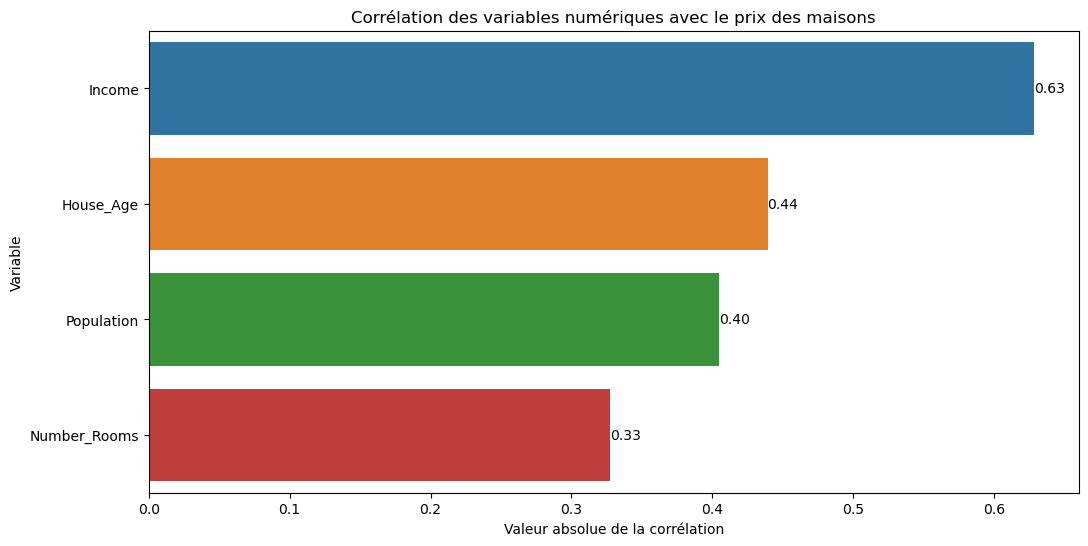

In [17]:
# Selection des variables
num_vars = df.select_dtypes(include=np.number).drop(columns=['Price']).columns

# Calcul de la corrélation entre chaque variable numérique et la variable cible (en valeur absolue)
correlations = abs(df2[num_vars].corrwith(df['Price'])).sort_values(ascending=False)

# Représentation graphique des corrélations
plt.figure(figsize=(12, 6))
bars = sns.barplot(x=correlations.values, y=correlations.index)

# Ajouter des étiquettes de données sur chaque barre
for bar in bars.patches:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, 
             f'{bar.get_width():.2f}', 
             va='center')

plt.xlabel("Valeur absolue de la corrélation")
plt.ylabel("Variable")
plt.title("Corrélation des variables numériques avec le prix des maisons")
plt.show()

## Separation en base de train et test (Data and Target Split)

In [18]:
# Diviser les données en ensembles d'apprentissage et de test
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

# preparation des donnees en train et test x toutes les variables de bdd et y la colonne Price
X = df.drop('Price', axis=1)  # Variables prédictives
y = df['Price']  # Variable cible

# Diviser la base de données en train et test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
#  Entraîner le modèle sur les données d'entraînement
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)

LinearRegression()

In [20]:
# Affichage des coefficients
coef_df=pd.DataFrame(lr_model.coef_,X_train.columns,columns=['Coefficient'])
coef_df

,Coefficient
Income,21.659750
House_Age,164702.184429
Number_Rooms,121003.907115
Population,15.265506


In [21]:
#calculate R-squared of regression model
r_squared = lr_model.score(X_train, y_train)

#view R-squared value
print(r_squared)

0.9179227041506954


91,8% de la variabilité du prix des maisons sont expliquées par le modele

In [22]:
# prediction du modele qui est faite toujours sur les données test
y_pred=lr_model.predict(X_test)

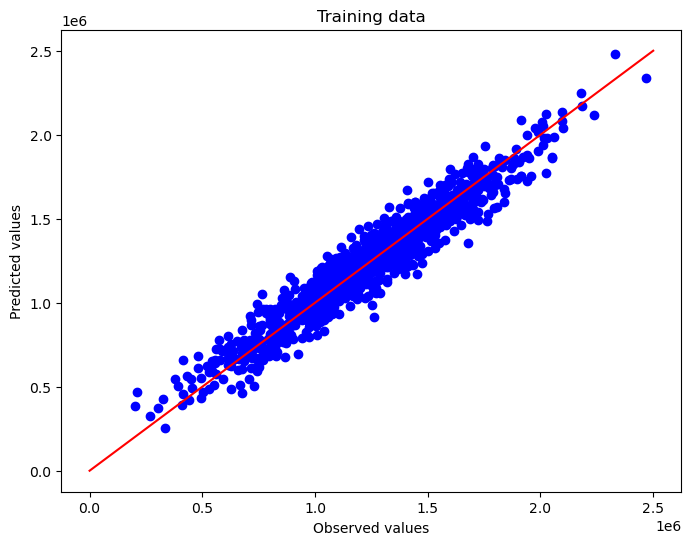

In [23]:
# Tracer les valeurs observées en fonction des valeurs prédites sur les données d'entraînement
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel('Observed values')
plt.ylabel('Predicted values')
plt.title('Training data')
plt.plot(np.arange(0, 3000000, 500000), np.arange(0, 3000000, 500000), color='red')
plt.show()

In [24]:
# Affichage des valeur estimé et predite et leur difference
y_pred_df=pd.DataFrame({'Valeur Actuelle':y_test,'Valeur predicte':y_pred,'Difference':y_test-y_pred})
y_pred_df[0:20]

,Valeur Actuelle,Valeur predicte,Difference
1501,1.339096e+06,1.309580e+06,29516.062793
2586,1.251794e+06,1.238948e+06,12846.431398
2653,1.340095e+06,1.247877e+06,92217.690017
1055,1.431508e+06,1.229480e+06,202027.616845
705,1.042374e+06,1.066189e+06,-23815.065951
106,1.555321e+06,1.546651e+06,8669.401081
589,1.250882e+06,1.096610e+06,154271.860801
2468,1.039381e+06,8.313095e+05,208071.231561
2413,8.324752e+05,7.862380e+05,46237.232199
1600,1.420648e+06,1.470839e+06,-50190.912784


In [25]:
#prediction
y_pred_train=lr_model.predict(X_train)

#Evaaluation de l'algo
from sklearn import metrics
# Obtention des prédictions et des métriques d'évaluation

MAE_train=metrics.mean_absolute_error(y_train, y_pred_train)
MSE_train=metrics.mean_squared_error(y_train, y_pred_train)
RMSE_train=np.sqrt(metrics.mean_squared_error(y_train, y_pred_train))
R2_train=r2_score(y_train, y_pred_train)

MAE_test=metrics.mean_absolute_error(y_test, y_pred)
MSE_test=metrics.mean_squared_error(y_test, y_pred)
RMSE_test=np.sqrt(metrics.mean_squared_error(y_test, y_pred))
R2_test=r2_score(y_test, y_pred)


# Affichage des résultats dans un tableau
results = pd.DataFrame({'Métrique': ['MAE','MSE','RMSE', 'R2'], 
                        'Apprentissage': [MAE_train, MSE_train, RMSE_train, R2_train], 
                        'Test': [MAE_test, MSE_test, RMSE_test, R2_test]})
results.set_index('Métrique', inplace=True)
print(results)

          Apprentissage          Test
Métrique                             
MAE        8.148938e+04  8.085779e+04
MSE        1.026333e+10  1.007372e+10
RMSE       1.013081e+05  1.003679e+05
R2         9.179227e-01  9.181214e-01


## Vérification des hypothèses du modèles

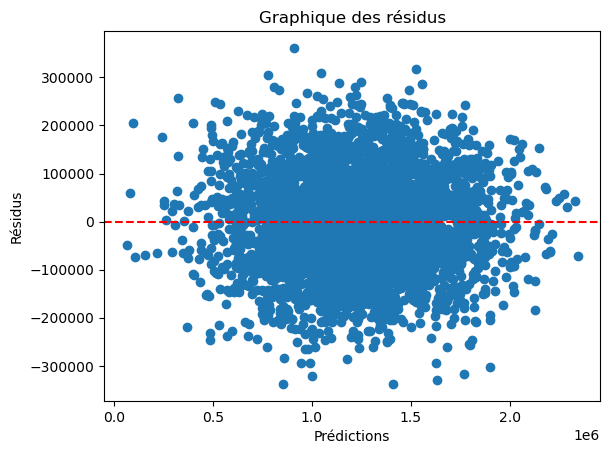

In [26]:
from sklearn.linear_model import LinearRegression
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm


# H2- Verification de l'hyptosese d'homocedasticité des residus

y_pred_train = lr_model.predict(X_train)
residuals = y_train - y_pred_train

plt.scatter(y_pred_train, residuals)
plt.xlabel('Prédictions')
plt.ylabel('Résidus')
plt.title('Graphique des résidus')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()


Ici on voit clairement que les residus sont homogène car on ne voit aucune tendance avec les courbes.

In [27]:
# Vérifier la multicolinéarité
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
# Ajouter une troisième colonne pour afficher "oui" si le VIF est inférieur à 5%, sinon "non"
vif_data['Multicolinearité?'] = ['Non' if vif < 5 else 'Oui' for vif in vif_data['VIF']]
print(vif_data)

        feature        VIF Multicolinearité?
0        Income  29.632060               Oui
1     House_Age  27.446757               Oui
2  Number_Rooms  32.156187               Oui
3    Population  12.813187               Oui


Les variables ne sont pas correlées entre elles car les VIF sont <5

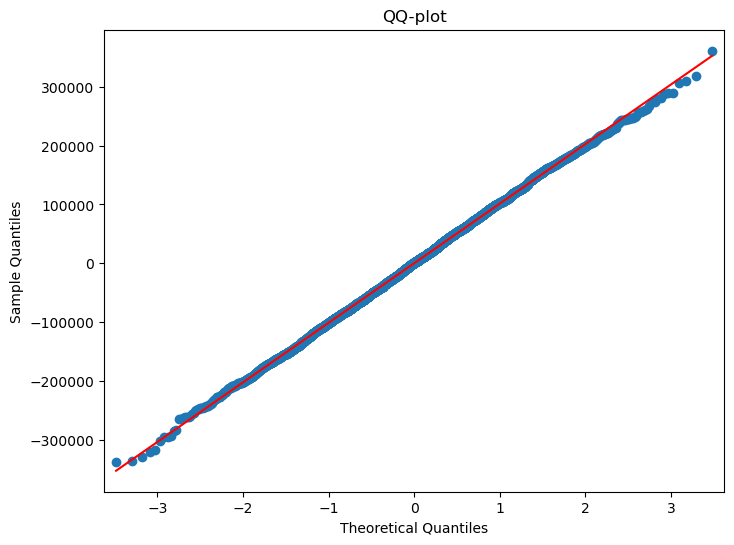

In [28]:
# QQ-plot
fig, ax = plt.subplots(figsize=(8, 6))
sm.qqplot(residuals, line='s', ax=ax)
ax.set_title('QQ-plot')
plt.show()

In [29]:
import scipy.stats as stats
alpha=0.05
# Test de Shapiro-Wilk
shapiro_test = stats.shapiro(residuals)

test_results = pd.DataFrame({
    'Nom du test': ['Shapiro-Wilk'],
    'Statistique de test': [shapiro_test[0]],
    'p-valeur': [shapiro_test[1]],
    'Normalité': ['Oui' if shapiro_test[1] > alpha else 'Non',
                 ]
  })

print(test_results)  

    Nom du test  Statistique de test  p-valeur Normalité
0  Shapiro-Wilk             0.999496  0.386034       Oui


La normalité est verifié car p-valeur>5%

In [30]:
# H3 - Independance des erreurs (Test d'autocorrélation Vérification de l'autocorrélation )

from statsmodels.stats.stattools import durbin_watson
dw_test = durbin_watson(residuals)
print("Test de Durbin-Watson : statistique = %f" % dw_test)
if dw_test>2:
    print('Les residus sont autocorrelés')
else:
    print('les residus sont independants')


Test de Durbin-Watson : statistique = 1.966666
les residus sont independants


La verification de cette hypothese peut omise tant qu'on ne travaille pas sur les series temporelles, car elle est rarement verifié

In [31]:
# H1: erreurs centrés

# verification de la Nullité de l’Esperance des erreurs 
residuals.mean()

8.207280188798904e-11

Cette hypthosese est toujours verifié

## Utilisation du modèle pour réaliser des prédictions

In [32]:
# predicition du prix d'achat des maisons
def prix_maison():
    var1 = input("Entrer le revenu de la famille:\n>>>")
    var2 = input("Entrez l'age de la maison que vous souhaitez:\n>>>")
    var3 = input("Entrez le nombre de pièces que vous voulez:\n>>>")
    var4 = input("Entrez la densité de la population que vous voulez:\n>>>")
    Newdata=[[var1,var2,var3,var4]]
    Newtest=pd.DataFrame(Newdata,columns=['Income','House_Age','Number_Rooms','Population'])
    yNew_predit = lr_model.predict(Newtest)
    print('le prix de cette maison vaut', yNew_predit)
prix_maison()

Entrer le revenu de la famille:
>>>79248
Entrez l'age de la maison que vous souhaitez:
>>>6
Entrez le nombre de pièces que vous voulez:
>>>6
Entrez la densité de la population que vous voulez:
>>>40173
le prix de cette maison vaut [1408446.23180231]


# Regression logistique

Ici nous allons faire une regression logistique pour predire si la personne a un risque de maladie cardiaque ou pas. Nous avons une base de données qui contient les informations sur le genre(**sexe**), l'age(**age**),si la personne fume ou pas (**currentSmoker**),le nombre de cigarette fumé par jour (**cigsPerDay**),si la personne est diabetique ou pas (**diabetes**),la mesure de la pression l'indice de masse corporelle(**BMI**), Le taux de cholesterol (**totChol**),la tension arterielle(**sysBP**),pression artérielle diastolique(**diaBP**),la fréquence cardiaque(**heartRate**),le taux de glucose dans le sang(**glucose**) des patients et la variable cible **risque** qui est à prédire, les valeurs de 1 indiquant le risque et de 0 indiquant l'absence risque.

In [33]:
df3 = pd.read_csv("heart.csv")
df3

,sexe,age,currentSmoker,cigsPerDay,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,risque
0,female,39,no,0.0,no,195.0,106.0,70.0,26.97,80.0,77.0,0
1,male,46,no,0.0,no,250.0,121.0,81.0,28.73,95.0,76.0,0
2,female,48,yes,20.0,no,245.0,127.5,80.0,25.34,75.0,70.0,0
3,male,61,yes,30.0,no,225.0,150.0,95.0,28.58,65.0,103.0,1
4,male,46,yes,23.0,no,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4233,female,50,yes,1.0,no,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,female,51,yes,43.0,no,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,male,48,yes,20.0,no,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,male,44,yes,15.0,no,210.0,126.5,87.0,19.16,86.0,NaN,0


## Nettoyage des données

In [34]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sexe           4238 non-null   object 
 1   age            4238 non-null   int64  
 2   currentSmoker  4238 non-null   object 
 3   cigsPerDay     4209 non-null   float64
 4   diabetes       4238 non-null   object 
 5   totChol        4188 non-null   float64
 6   sysBP          4238 non-null   float64
 7   diaBP          4238 non-null   float64
 8   BMI            4219 non-null   float64
 9   heartRate      4237 non-null   float64
 10  glucose        3850 non-null   float64
 11  risque         4238 non-null   int64  
dtypes: float64(7), int64(2), object(3)
memory usage: 397.4+ KB


In [35]:
df3.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4238.0,49.584946,8.572160,32.00,42.00,49.0,56.000,70.0
cigsPerDay,4209.0,9.003089,11.920094,0.00,0.00,0.0,20.000,70.0
totChol,4188.0,236.721585,44.590334,107.00,206.00,234.0,263.000,696.0
sysBP,4238.0,132.352407,22.038097,83.50,117.00,128.0,144.000,295.0
diaBP,4238.0,82.893464,11.910850,48.00,75.00,82.0,89.875,142.5
BMI,4219.0,25.802008,4.080111,15.54,23.07,25.4,28.040,56.8
heartRate,4237.0,75.878924,12.026596,44.00,68.00,75.0,83.000,143.0
glucose,3850.0,81.966753,23.959998,40.00,71.00,78.0,87.000,394.0
risque,4238.0,0.151958,0.359023,0.00,0.00,0.0,0.000,1.0


### Detection des valeurs manquantes

In [36]:
# Detection des valeurs manquantes

missing_values = df3.isnull().sum()
#Calcul de la proportion des valeurs manquante
missing_percent = missing_values / len(df3)
# creation d'un dataframe avec les nombres et proportion des valeurs manquantes
missing_df=pd.concat([missing_values,missing_percent],axis=1)
missing_df.columns=['Nombre de valeurs manquantes','Proportion de valeurs manquantes']

#Tri des variable par odre des proportion des valeurs manquantes
missing_df=missing_df.sort_values('Proportion de valeurs manquantes',ascending=False)
missing_df

,Nombre de valeurs manquantes,Proportion de valeurs manquantes
glucose,388,0.091553
totChol,50,0.011798
cigsPerDay,29,0.006843
BMI,19,0.004483
heartRate,1,0.000236
sexe,0,0.000000
age,0,0.000000
currentSmoker,0,0.000000
diabetes,0,0.000000
sysBP,0,0.000000


<Axes: >

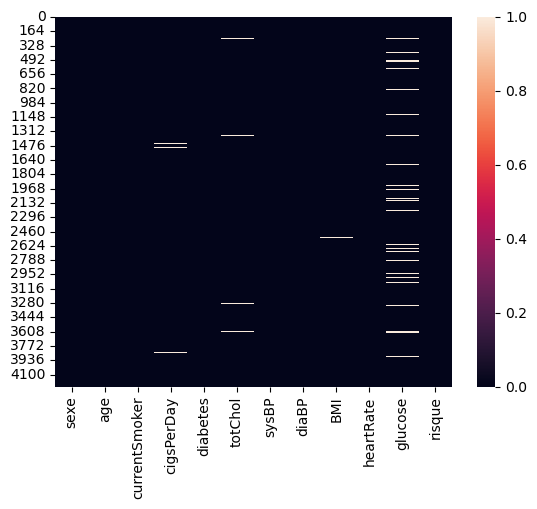

In [37]:
# Visualiser les valeurs manquantes avec missingno

#Avec seaborn
sns.heatmap(df3.isnull())

Nous avons des valeurs manquantes, comme la proportion n'est pas elevé nous allons les supprimer

In [38]:
# Affichage des lignes qui contiennent les valeurs manquantes
lignes_manquantes = df3[df3.isnull().any(axis=1)]
lignes_manquantes

,sexe,age,currentSmoker,cigsPerDay,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,risque
14,male,39,yes,9.0,no,226.0,114.0,64.0,22.35,85.0,NaN,0
21,male,43,no,0.0,no,185.0,123.5,77.5,29.89,70.0,NaN,0
26,male,60,no,0.0,no,260.0,110.0,72.5,26.59,65.0,NaN,0
42,male,52,no,0.0,no,NaN,148.0,92.0,25.09,70.0,NaN,1
54,male,39,yes,20.0,no,209.0,115.0,75.0,22.54,90.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4185,female,58,no,0.0,no,NaN,116.5,71.0,27.04,70.0,86.0,0
4208,male,51,yes,9.0,no,340.0,152.0,76.0,25.74,70.0,NaN,0
4229,male,51,yes,20.0,no,251.0,140.0,80.0,25.60,75.0,NaN,0
4230,male,56,yes,3.0,no,268.0,170.0,102.0,22.89,57.0,NaN,0


### Suppression des valeurs manquantes

In [39]:
#Suppression des valeur manquates
df3=df3.dropna(axis=0)

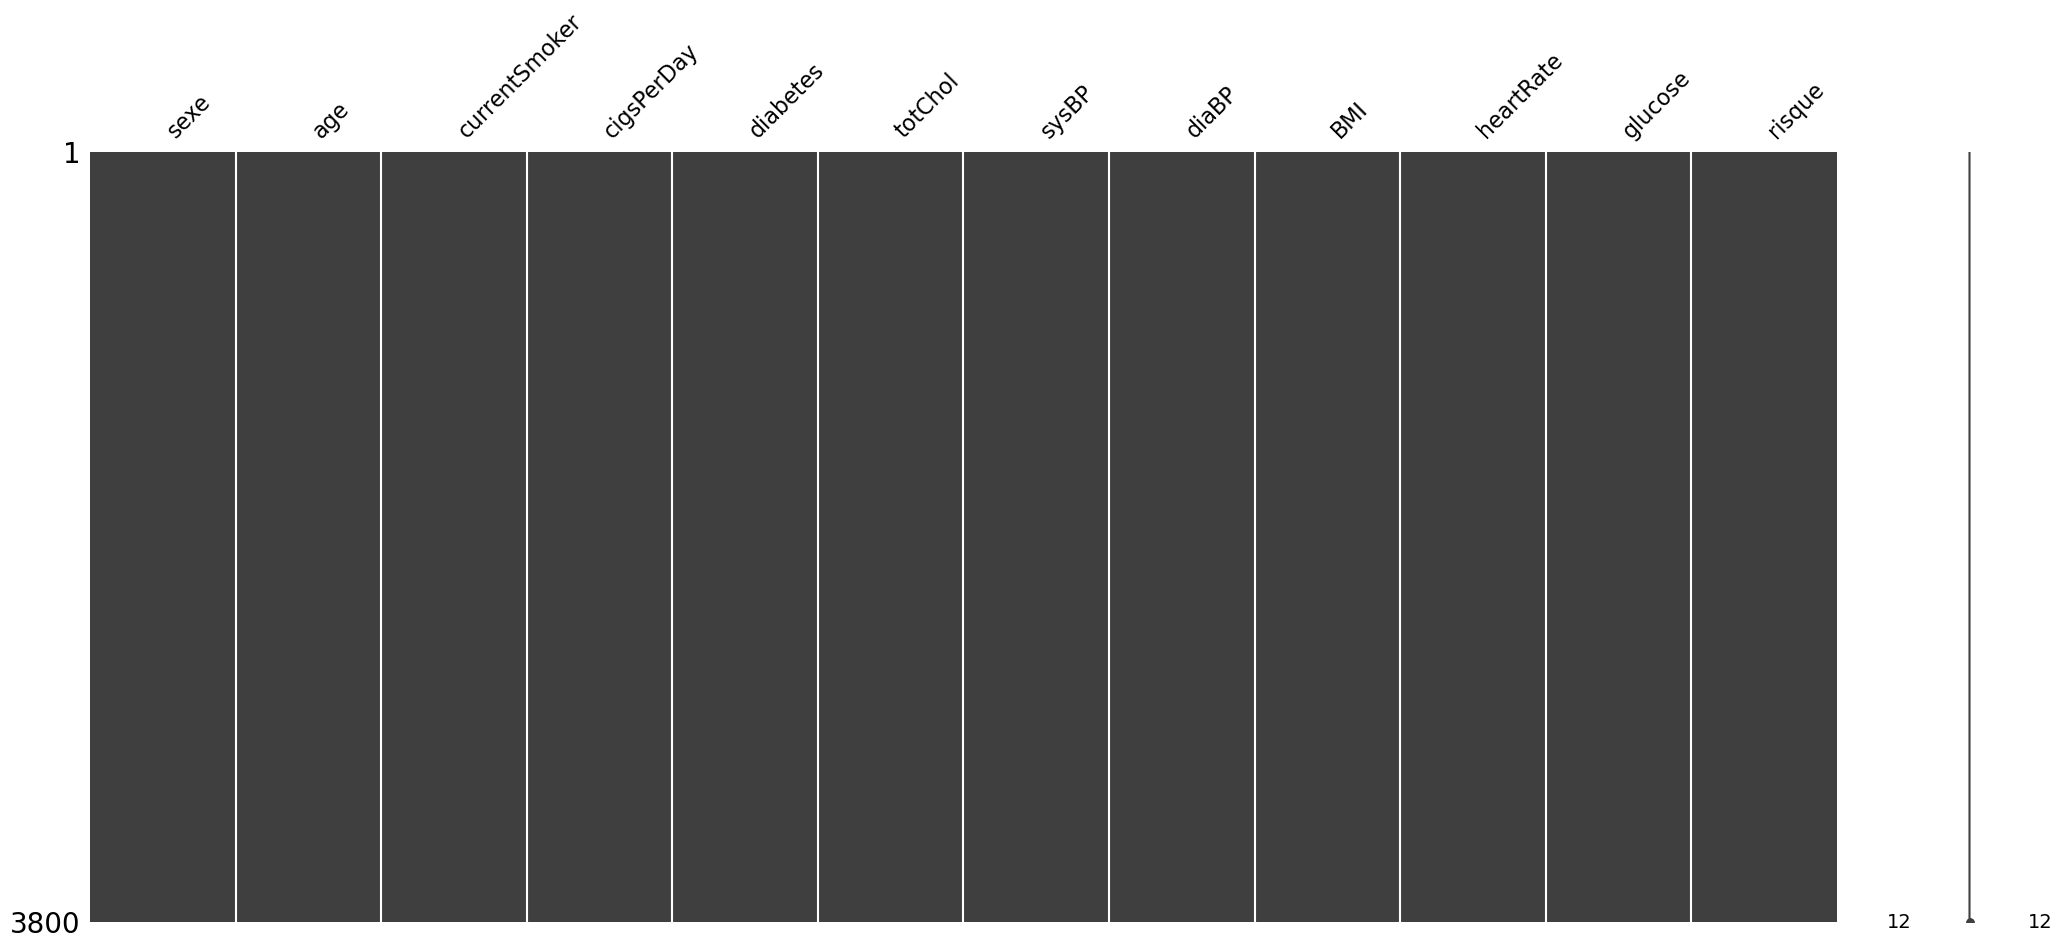

In [40]:
# Visualiser les valeurs manquantes avec missingno
import missingno as msno
msno.matrix(df3)
plt.show()



### Detection des doublons

In [41]:
#recherche de doublons
df3.duplicated().sum()

0

### Detection des Outliers

In [42]:
# Detection des valeurs aberrantes

# Fonction pour detecter les valeurs abeerantes.
def detect_outliers(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - (1.5 * IQR)
    upper_limit = Q3 + (1.5 * IQR)
    outliers = data[(data[col] < lower_limit) | (data[col] > upper_limit)]
    
    if len(outliers) == 0:
        return 'No Outliers Present'
    else:
        return outliers

In [43]:
# Affichage des valeurs aberantes --

#Selection des variables numériques
quant_vars = df3.select_dtypes(include=np.number).drop(columns=['risque']).columns
for col in quant_vars:
    print('-' * 27, col,'-' * 26)
    print(detect_outliers(df3, col))
    print('\n')

--------------------------- age --------------------------
No Outliers Present


--------------------------- cigsPerDay --------------------------
        sexe  age currentSmoker  cigsPerDay diabetes  totChol  sysBP  diaBP  \
327   female   56           yes        60.0       no    246.0  125.0   79.0   
721   female   59           yes        60.0       no    298.0  153.5  105.0   
1054  female   58           yes        60.0       no    250.0  150.0   97.0   
1452  female   39           yes        60.0       no    215.0  112.0   65.0   
1468  female   50           yes        60.0       no    340.0  134.0   95.0   
1488  female   37           yes        60.0       no    254.0  122.5   82.5   
1849  female   48           yes        60.0       no    252.0  104.0   73.5   
2709  female   46           yes        60.0       no    285.0  121.0   82.0   
3008  female   40           yes        70.0       no    210.0  132.0   86.0   
3673  female   48           yes        60.0       no    232.0  

In [44]:
#Fonction pour afficher le nombre et proportion de valeur aberrantes
def proportion_of_outliers(data):
    outliers_info = {}  # Dictionnaire pour stocker le nombre et la proportion de valeurs aberrantes par colonne
    quant_vars = df3.select_dtypes(include=np.number).drop(columns=['risque']).columns
    for column in quant_vars:
        outliers = detect_outliers(data, column)
        total_rows = data.shape[0]
        num_outliers = len(outliers)

        if num_outliers == 0:
            proportion = 0
        else:
            proportion = num_outliers / total_rows

        outliers_info[column] = {'num_outliers': num_outliers, 'proportion': proportion}

    return outliers_info

In [45]:
# Affichage du nombre et proportion de valeur aberrantes

# Exemple d'utilisation

outliers_info = proportion_of_outliers(df3)

# Affichage des résultats pour chaque variable
for column, info in outliers_info.items():
    print(f"Variable: {column}")
    print(f"Nombre de valeurs aberrantes: {info['num_outliers']}")
    print(f"Proportion de valeurs aberrantes: {info['proportion']:.2%}")
    print("-" * 30)

Variable: age
Nombre de valeurs aberrantes: 19
Proportion de valeurs aberrantes: 0.50%
------------------------------
Variable: cigsPerDay
Nombre de valeurs aberrantes: 11
Proportion de valeurs aberrantes: 0.29%
------------------------------
Variable: totChol
Nombre de valeurs aberrantes: 44
Proportion de valeurs aberrantes: 1.16%
------------------------------
Variable: sysBP
Nombre de valeurs aberrantes: 113
Proportion de valeurs aberrantes: 2.97%
------------------------------
Variable: diaBP
Nombre de valeurs aberrantes: 71
Proportion de valeurs aberrantes: 1.87%
------------------------------
Variable: BMI
Nombre de valeurs aberrantes: 88
Proportion de valeurs aberrantes: 2.32%
------------------------------
Variable: heartRate
Nombre de valeurs aberrantes: 81
Proportion de valeurs aberrantes: 2.13%
------------------------------
Variable: glucose
Nombre de valeurs aberrantes: 184
Proportion de valeurs aberrantes: 4.84%
------------------------------


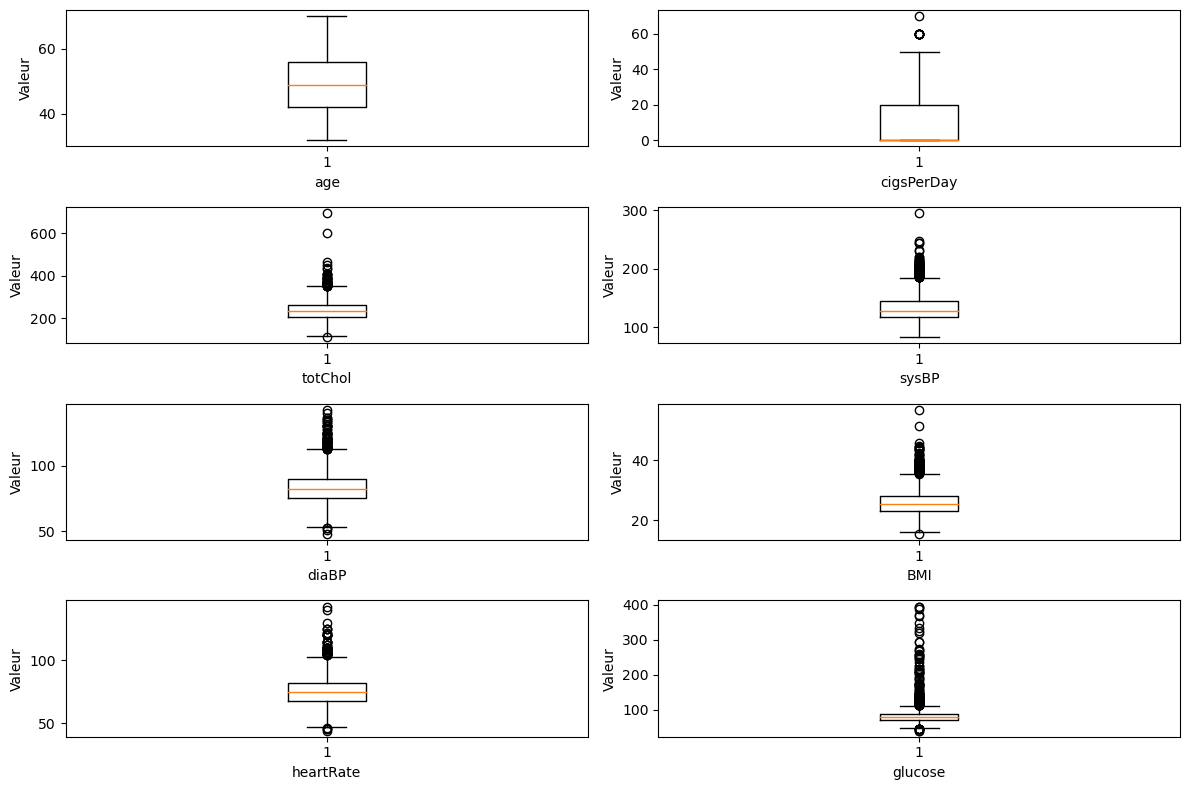

In [46]:
#Boxplot

# Visualisation des valeurs aberrantes

# Création des subplots pour chaque variable quantitative sur une même figure
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(12, 8))
axs = axs.flatten()
for i, var in enumerate(quant_vars):
    axs[i].boxplot(df3[var])
    axs[i].set_xlabel(var)
    axs[i].set_ylabel('Valeur')
plt.tight_layout()
plt.show()

Nous allons supprimer les valeurs aberrante pour toutes les variables independantes

### Suppression des valeurs aberrantes

In [47]:
#Fonction pour supprimer les valeurs aberrantes

def remove_outliers(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - (1.5 * IQR)
    upper_limit = Q3 + (1.5 * IQR)
    
    # Filtrer les valeurs aberrantes
    df_no_outliers = data[(data[col] >= lower_limit) & (data[col] <= upper_limit)]
    
    if len(df_no_outliers) == len(data):
        return 'No Outliers Present'
    else:
        return df_no_outliers

In [48]:
#Suppression des valeurs aberrantes
df4 = remove_outliers(df3, 'cigsPerDay')
df4 = remove_outliers(df4, 'totChol')
df4 = remove_outliers(df4, 'sysBP')
df4 = remove_outliers(df4, 'diaBP')
df4 = remove_outliers(df4, 'BMI')
df4 = remove_outliers(df4, 'heartRate')
df4 = remove_outliers(df4, 'glucose')

In [49]:
df4

,sexe,age,currentSmoker,cigsPerDay,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,risque
0,female,39,no,0.0,no,195.0,106.0,70.0,26.97,80.0,77.0,0
1,male,46,no,0.0,no,250.0,121.0,81.0,28.73,95.0,76.0,0
2,female,48,yes,20.0,no,245.0,127.5,80.0,25.34,75.0,70.0,0
3,male,61,yes,30.0,no,225.0,150.0,95.0,28.58,65.0,103.0,1
4,male,46,yes,23.0,no,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4232,female,68,no,0.0,no,176.0,168.0,97.0,23.14,60.0,79.0,1
4233,female,50,yes,1.0,no,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,female,51,yes,43.0,no,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,male,48,yes,20.0,no,248.0,131.0,72.0,22.00,84.0,86.0,0


## Descripition des données

### Variables quantitatives

#### Distribution et Boxplot

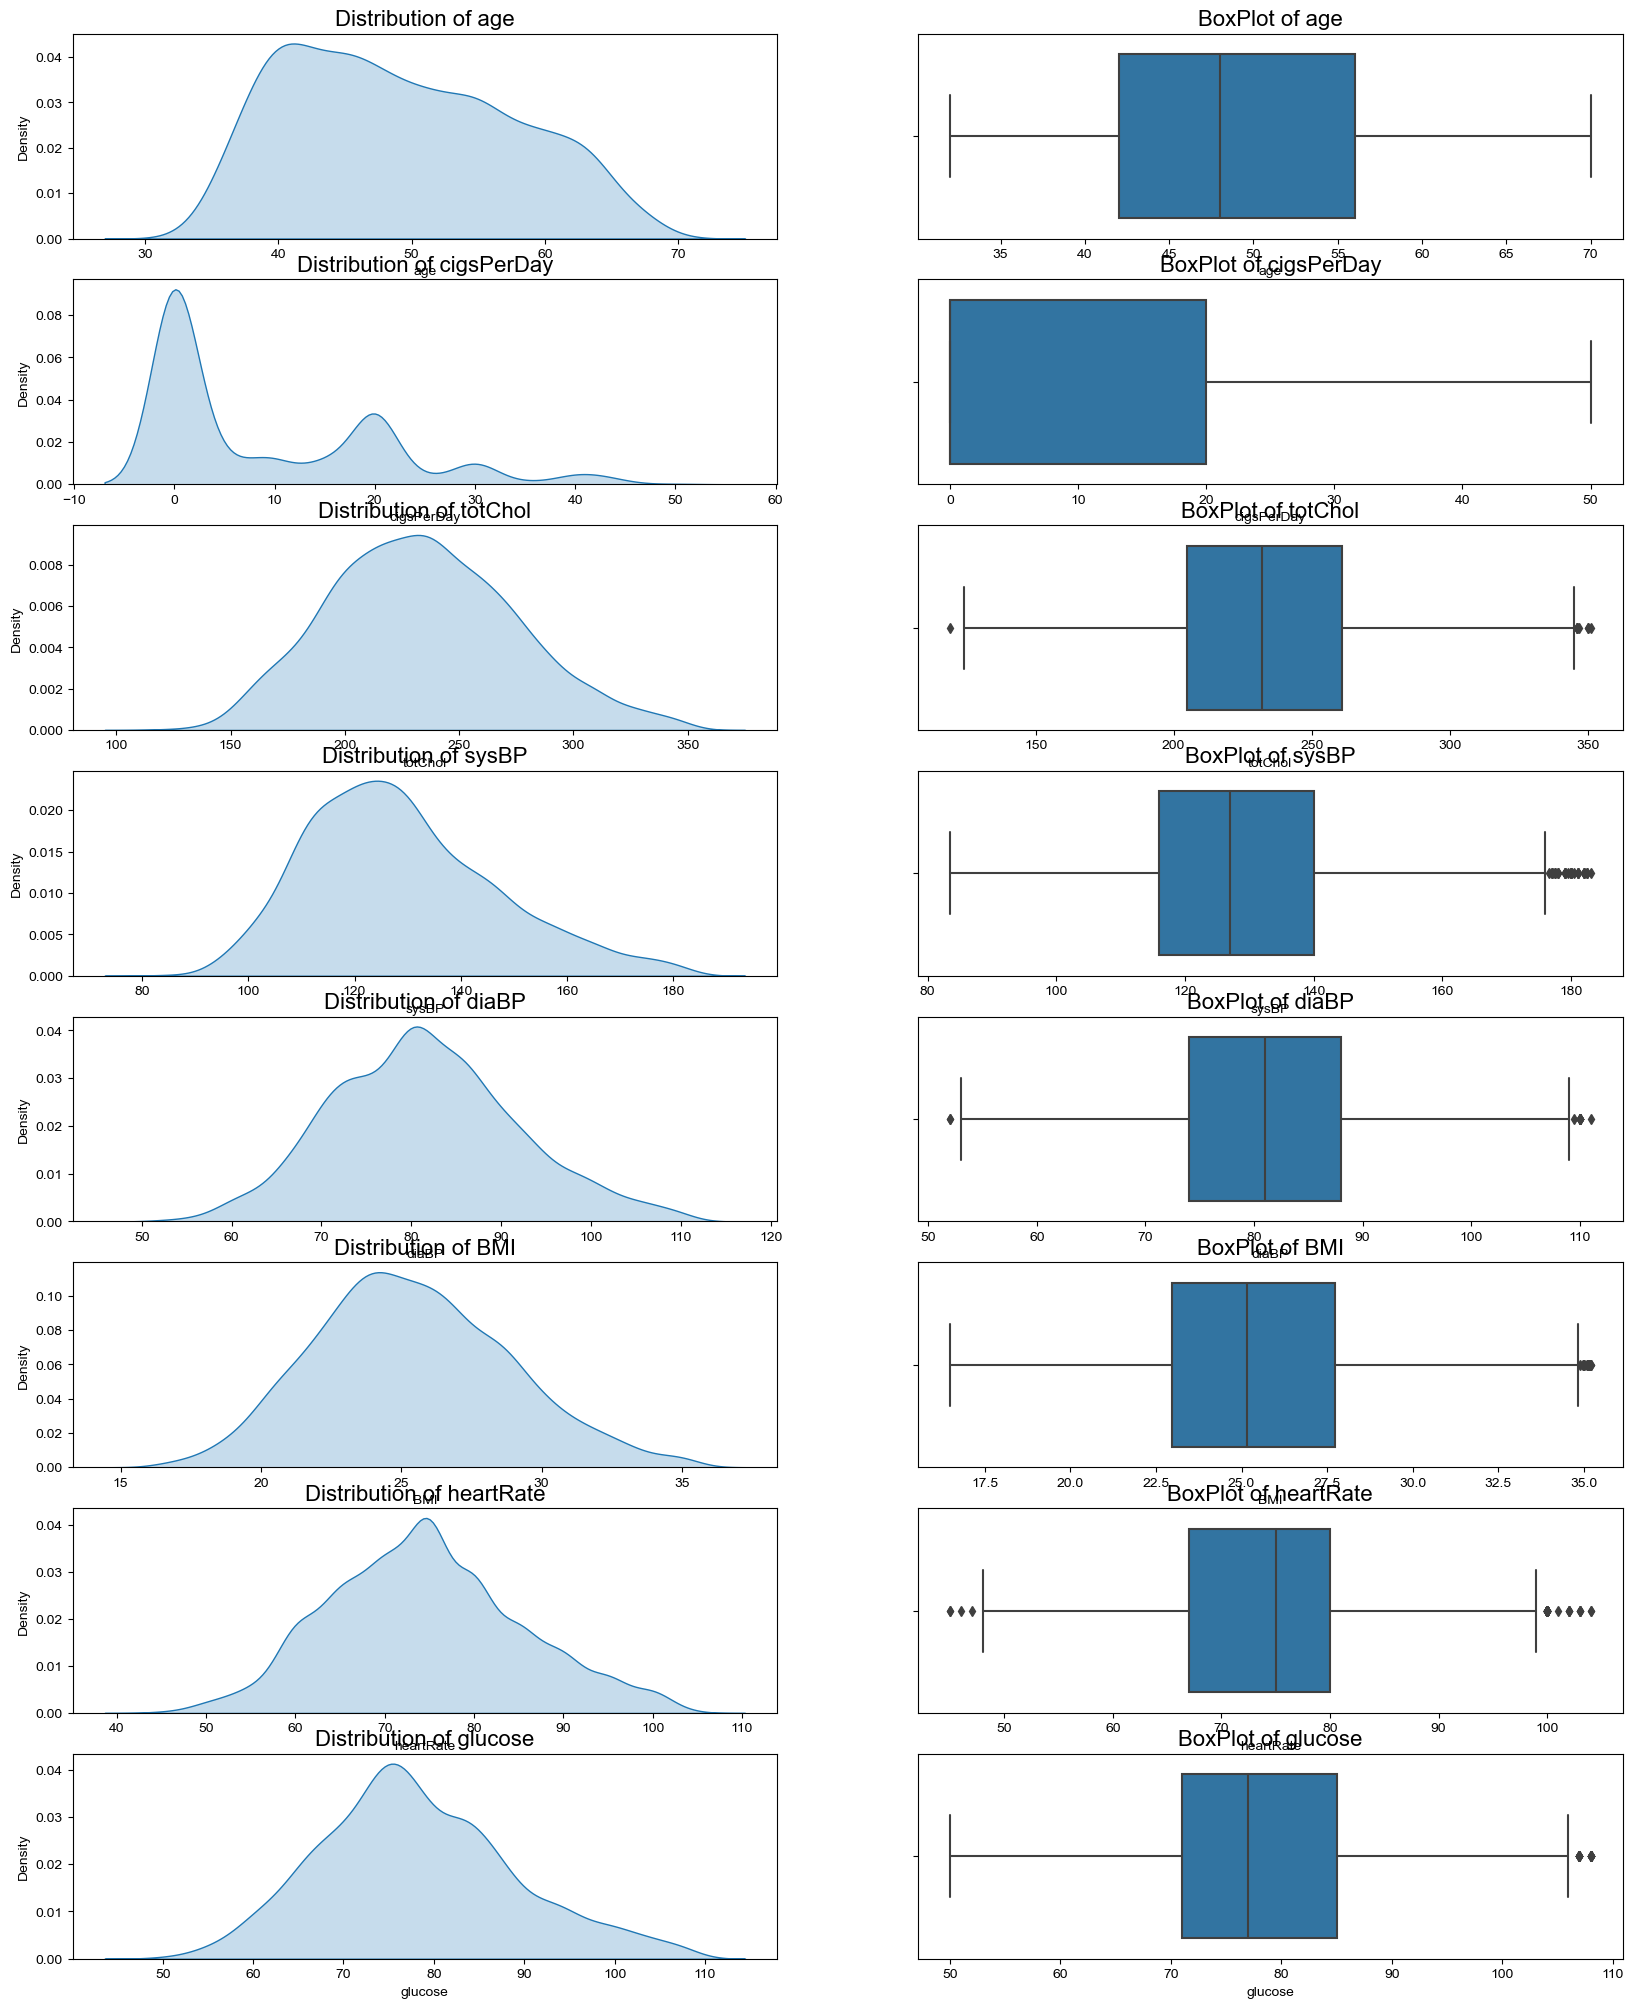

In [50]:
# Description des vaariables numeriques

#quant_vars = df4.drop(columns=['risque']).select_dtypes(exclude=['object']).columns
cat_vars = df4.drop(quant_vars,axis=1).drop(columns=['risque']).columns
# Boxplot et kde
fig, axes = plt.subplots(8,2, figsize=(20,25))
sns.set_style('darkgrid')
idx = 0
for col in (quant_vars):
    sns.kdeplot(data=df4, x=col,fill=True , 
                ax=axes[idx][0]).set_title(f'Distribution of {col}', fontsize='16')
    sns.boxplot(data=df4, x=col ,
                ax=axes[idx][1]).set_title(f'BoxPlot of {col}', fontsize='16')
    idx +=1
plt.show()


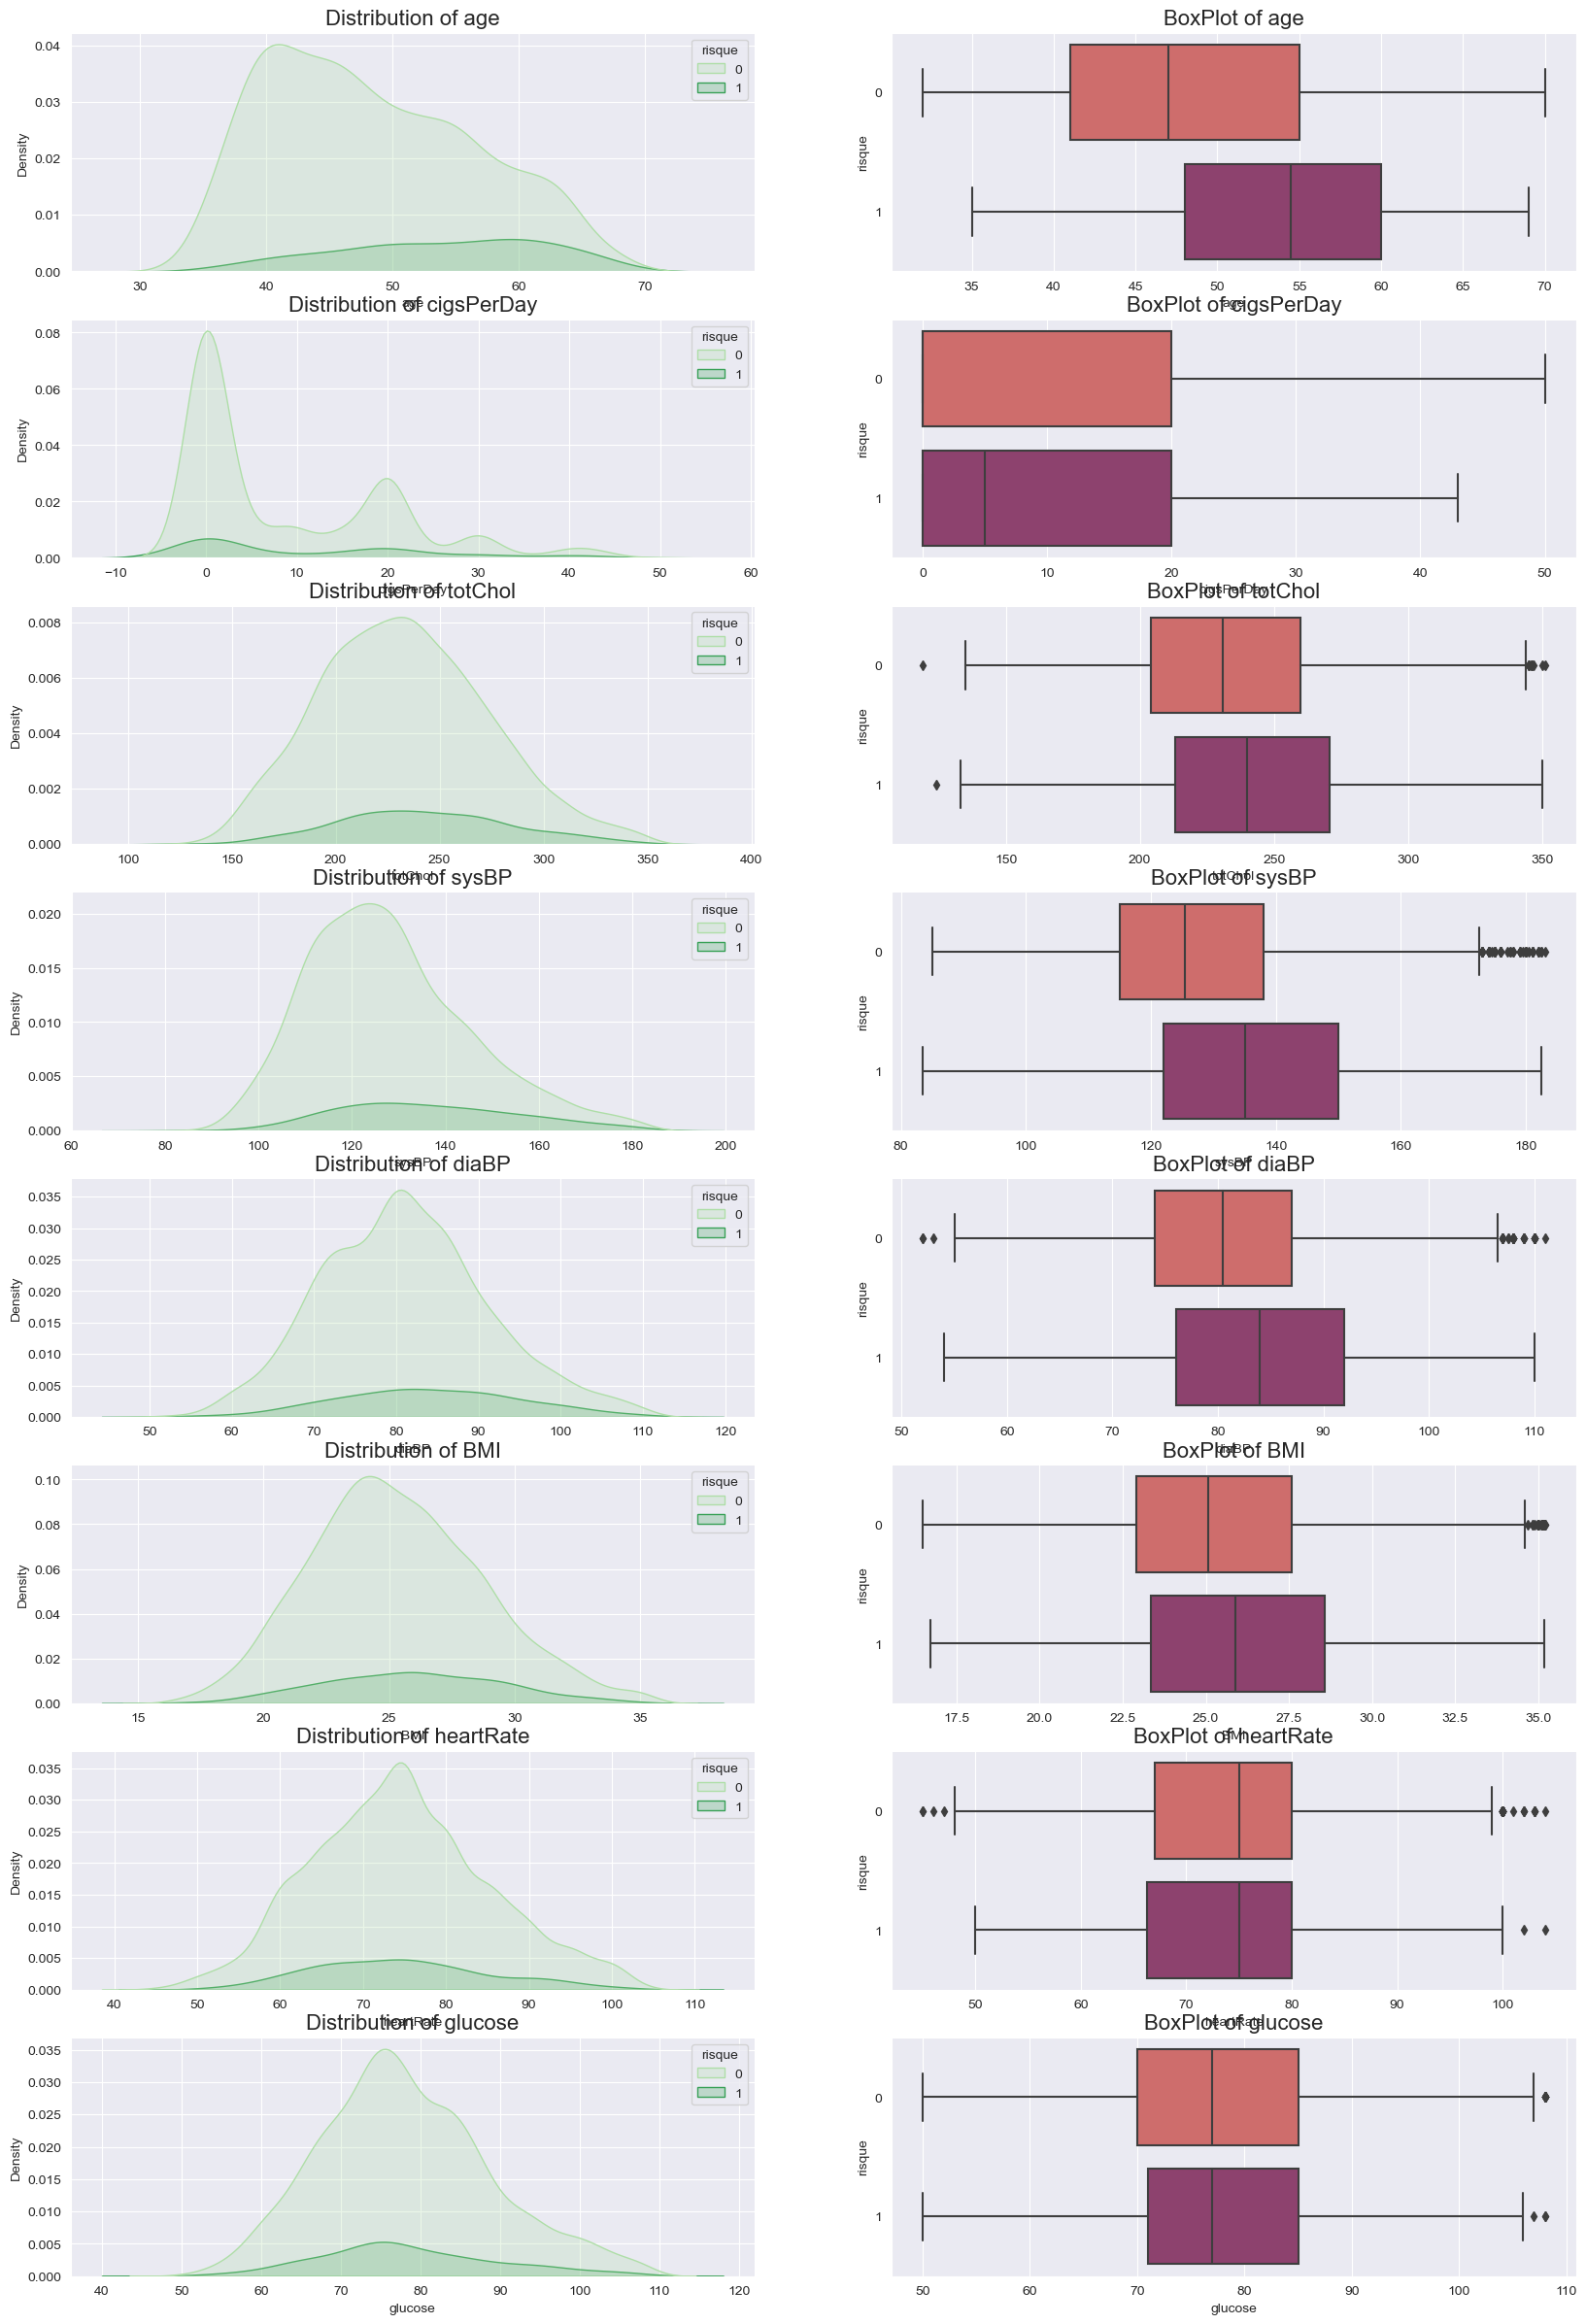

In [51]:
# Analyse bivariée entre les variables numériques et la variable cible

# Boxplot et kde
fig, axes = plt.subplots(8,2, figsize=(20,30))
sns.set_style('darkgrid')
idx = 0
for col in (quant_vars):
    sns.kdeplot(data=df4, x=col, palette='Greens',fill=True , hue='risque',
                ax=axes[idx][0]).set_title(f'Distribution of {col}', fontsize='16')
    sns.boxplot(data=df4, x=col, palette='flare',y='risque', orient='h',
                ax=axes[idx][1]).set_title(f'BoxPlot of {col}', fontsize='16')
    idx +=1
plt.show()


Pour toutes les variables on constate qu'elles dependent du risque de maladie cardiaque ou non, mais nous allons confirmer cette hypothese par un test. Nous allons utiliser le test de krukal-wallis car on n'a pas verifié si les données sont normalement distribuées.

#### Test Kruskal-wallis afin de confirmer les hypothèses

In [52]:
# Calcul des statistiques de test de Kruskal-Wallis et des p-valeurs pour chaque variable numérique
from scipy.stats import kruskal
p_values = []
for col in quant_vars:
    h, pval = kruskal(df4[col][df4['risque']==0], df4[col][df4['risque']==1])
    p_values.append(pval)

    # Création d'une liste pour stocker les valeurs de significativité
is_significant = []

# Vérification de la significativité pour chaque p-valeur et stockage dans la liste is_significant
for pval in p_values:
    if pval < 0.05:
        is_significant.append('Oui')
    else:
        is_significant.append('Non')

# Affichage des résultats dans un tableau
result_table = pd.DataFrame({'Variable': quant_vars, 'P-value': p_values, 'Significative': is_significant})
result_table.set_index('Variable', inplace=True)
print(result_table)

                 P-value Significative
Variable                              
age         4.525546e-35           Oui
cigsPerDay  4.507093e-04           Oui
totChol     3.405462e-06           Oui
sysBP       8.975951e-20           Oui
diaBP       9.207995e-08           Oui
BMI         1.428031e-04           Oui
heartRate   9.039822e-01           Non
glucose     6.137695e-01           Non


Toutes les variables verifient l'hypothèse à part les variables "heartrate" et "glucose"

#### Heatmap de corrélation

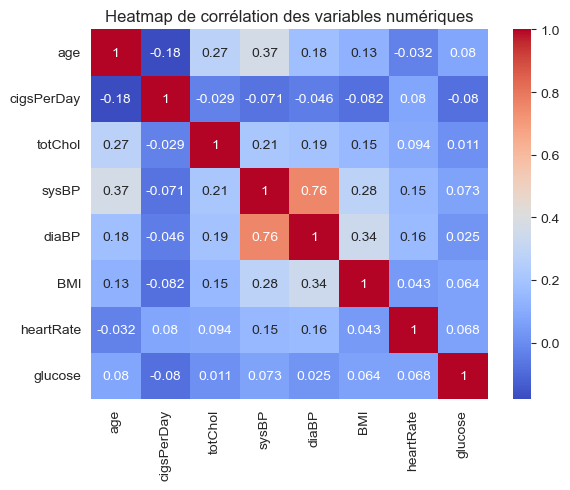

In [53]:
# Vérification de la corrélation entre les variables quantitatives

# Sélection des variables numériques
df_num = df4[quant_vars]

sns.heatmap(df_num.corr(), cmap='coolwarm', annot=True)
plt.title('Heatmap de corrélation des variables numériques')
plt.show()

On constate qu'il n'y a pas de forte corrélation entre les variables.

### Variables categorielles

#### Distribution de la variable cible

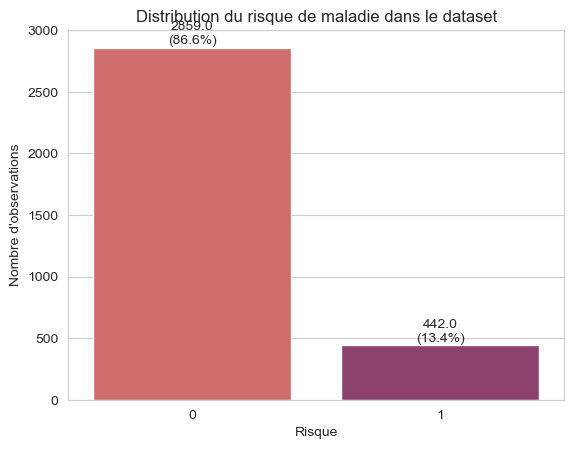

In [54]:
sns.set_style('whitegrid')

# Création du graphique
ax = sns.countplot(x='risque', data=df4, palette='flare')

# Calcul du total pour les pourcentages
total = len(df4['risque'])

# Ajout des annotations avec nombre et pourcentage
for p in ax.patches:
    height = p.get_height()
    percentage = 100 * height / total
    ax.annotate(f'{height}\n({percentage:.1f}%)', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')

# Ajout de titres et d'étiquettes
plt.xlabel('Risque')
plt.ylabel('Nombre d\'observations')
plt.title('Distribution du risque de maladie dans le dataset')

# Affichage du graphique
plt.show()

Les deux classes dans la base de données ne sont pas equilibrées, nous avons 87% de personnes qui ne présentent pas de risque de maladie cardiaque contre 13% qui ont un risque. Nous allons utiliser une methode d'echantillonnage pour equilibrer les deux classes du dataset

#### Distribution des variables catégorielles

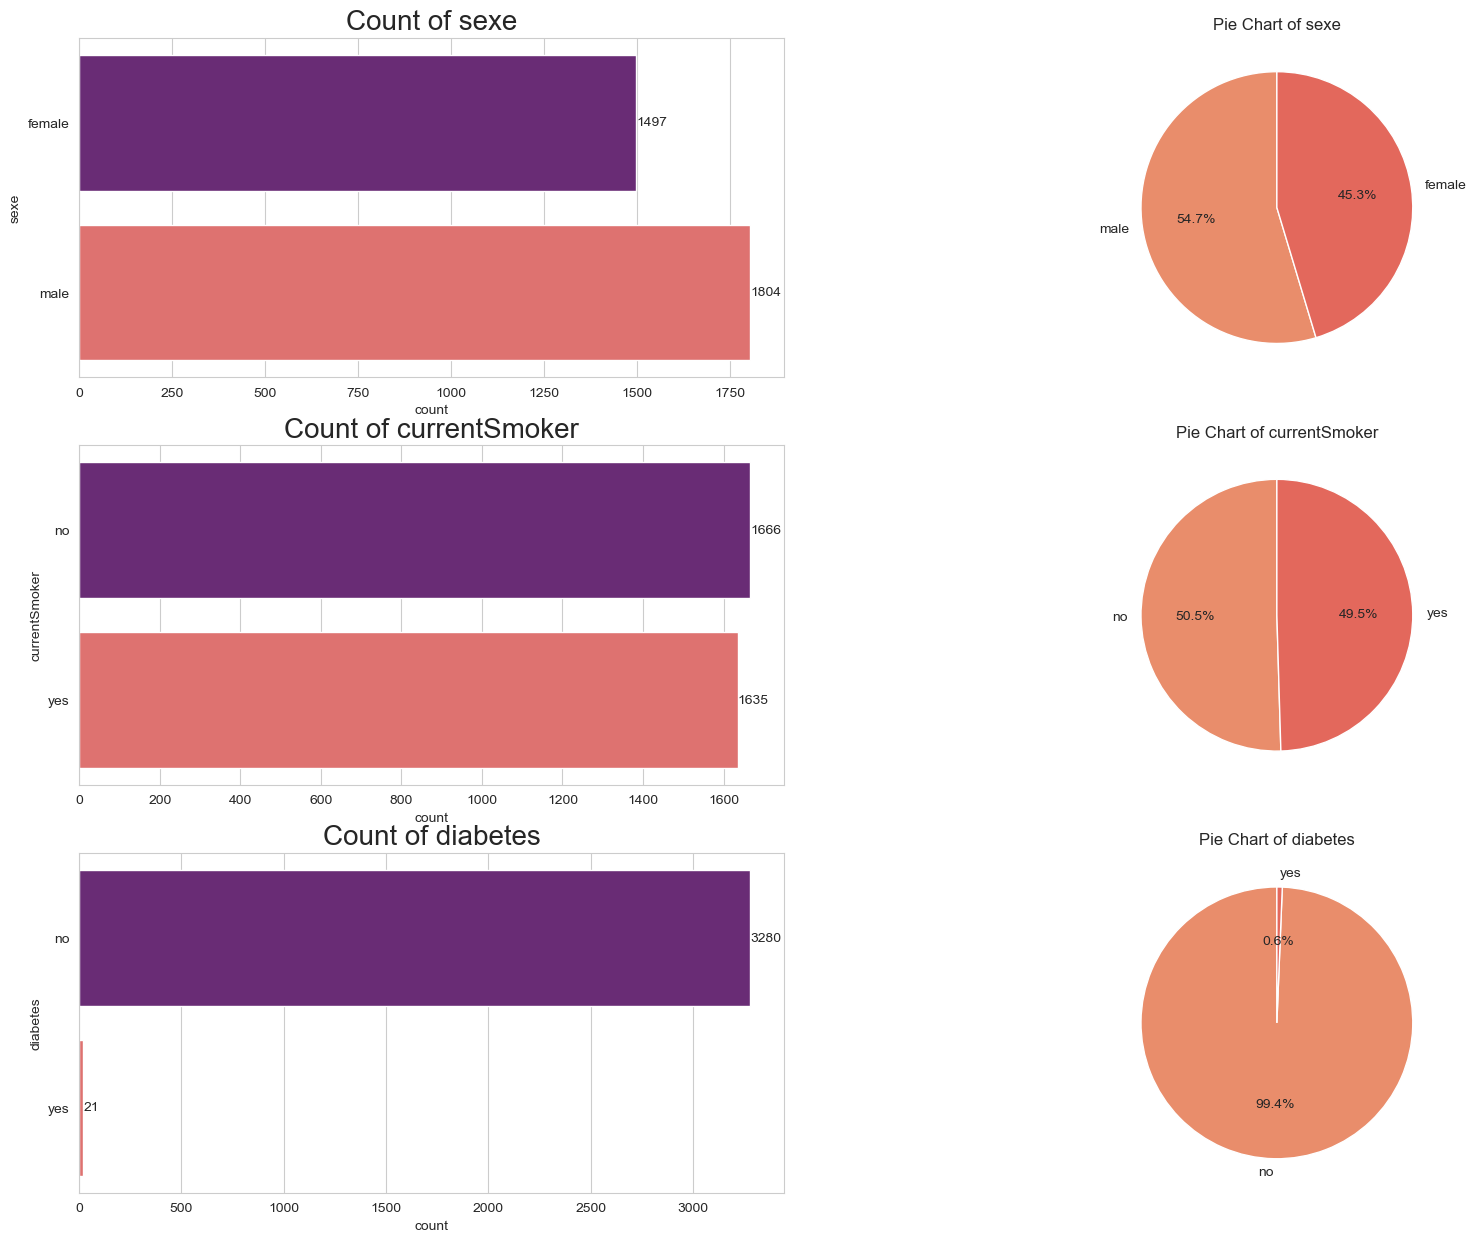

In [55]:
# analyse univarié des variables qualitatives

# Diagramme en barre
fig, axes = plt.subplots(len(cat_vars), 2, figsize=(20, 5 * len(cat_vars)))
sns.set_style('darkgrid')
idx = 0

for col in cat_vars:
    # Analyse univariée
    sns.countplot(data=df4, y=col, palette='magma', orient='h',
                  ax=axes[idx][0]).set_title(f'Count of {col}', fontsize='20')
    for container in axes[idx][0].containers:
        axes[idx][0].bar_label(container)
    counts = df4[col].value_counts()
    axes[idx][1].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('flare'))
    axes[idx][1].set_title(f'Pie Chart of {col}')
    
    idx += 1

plt.show()


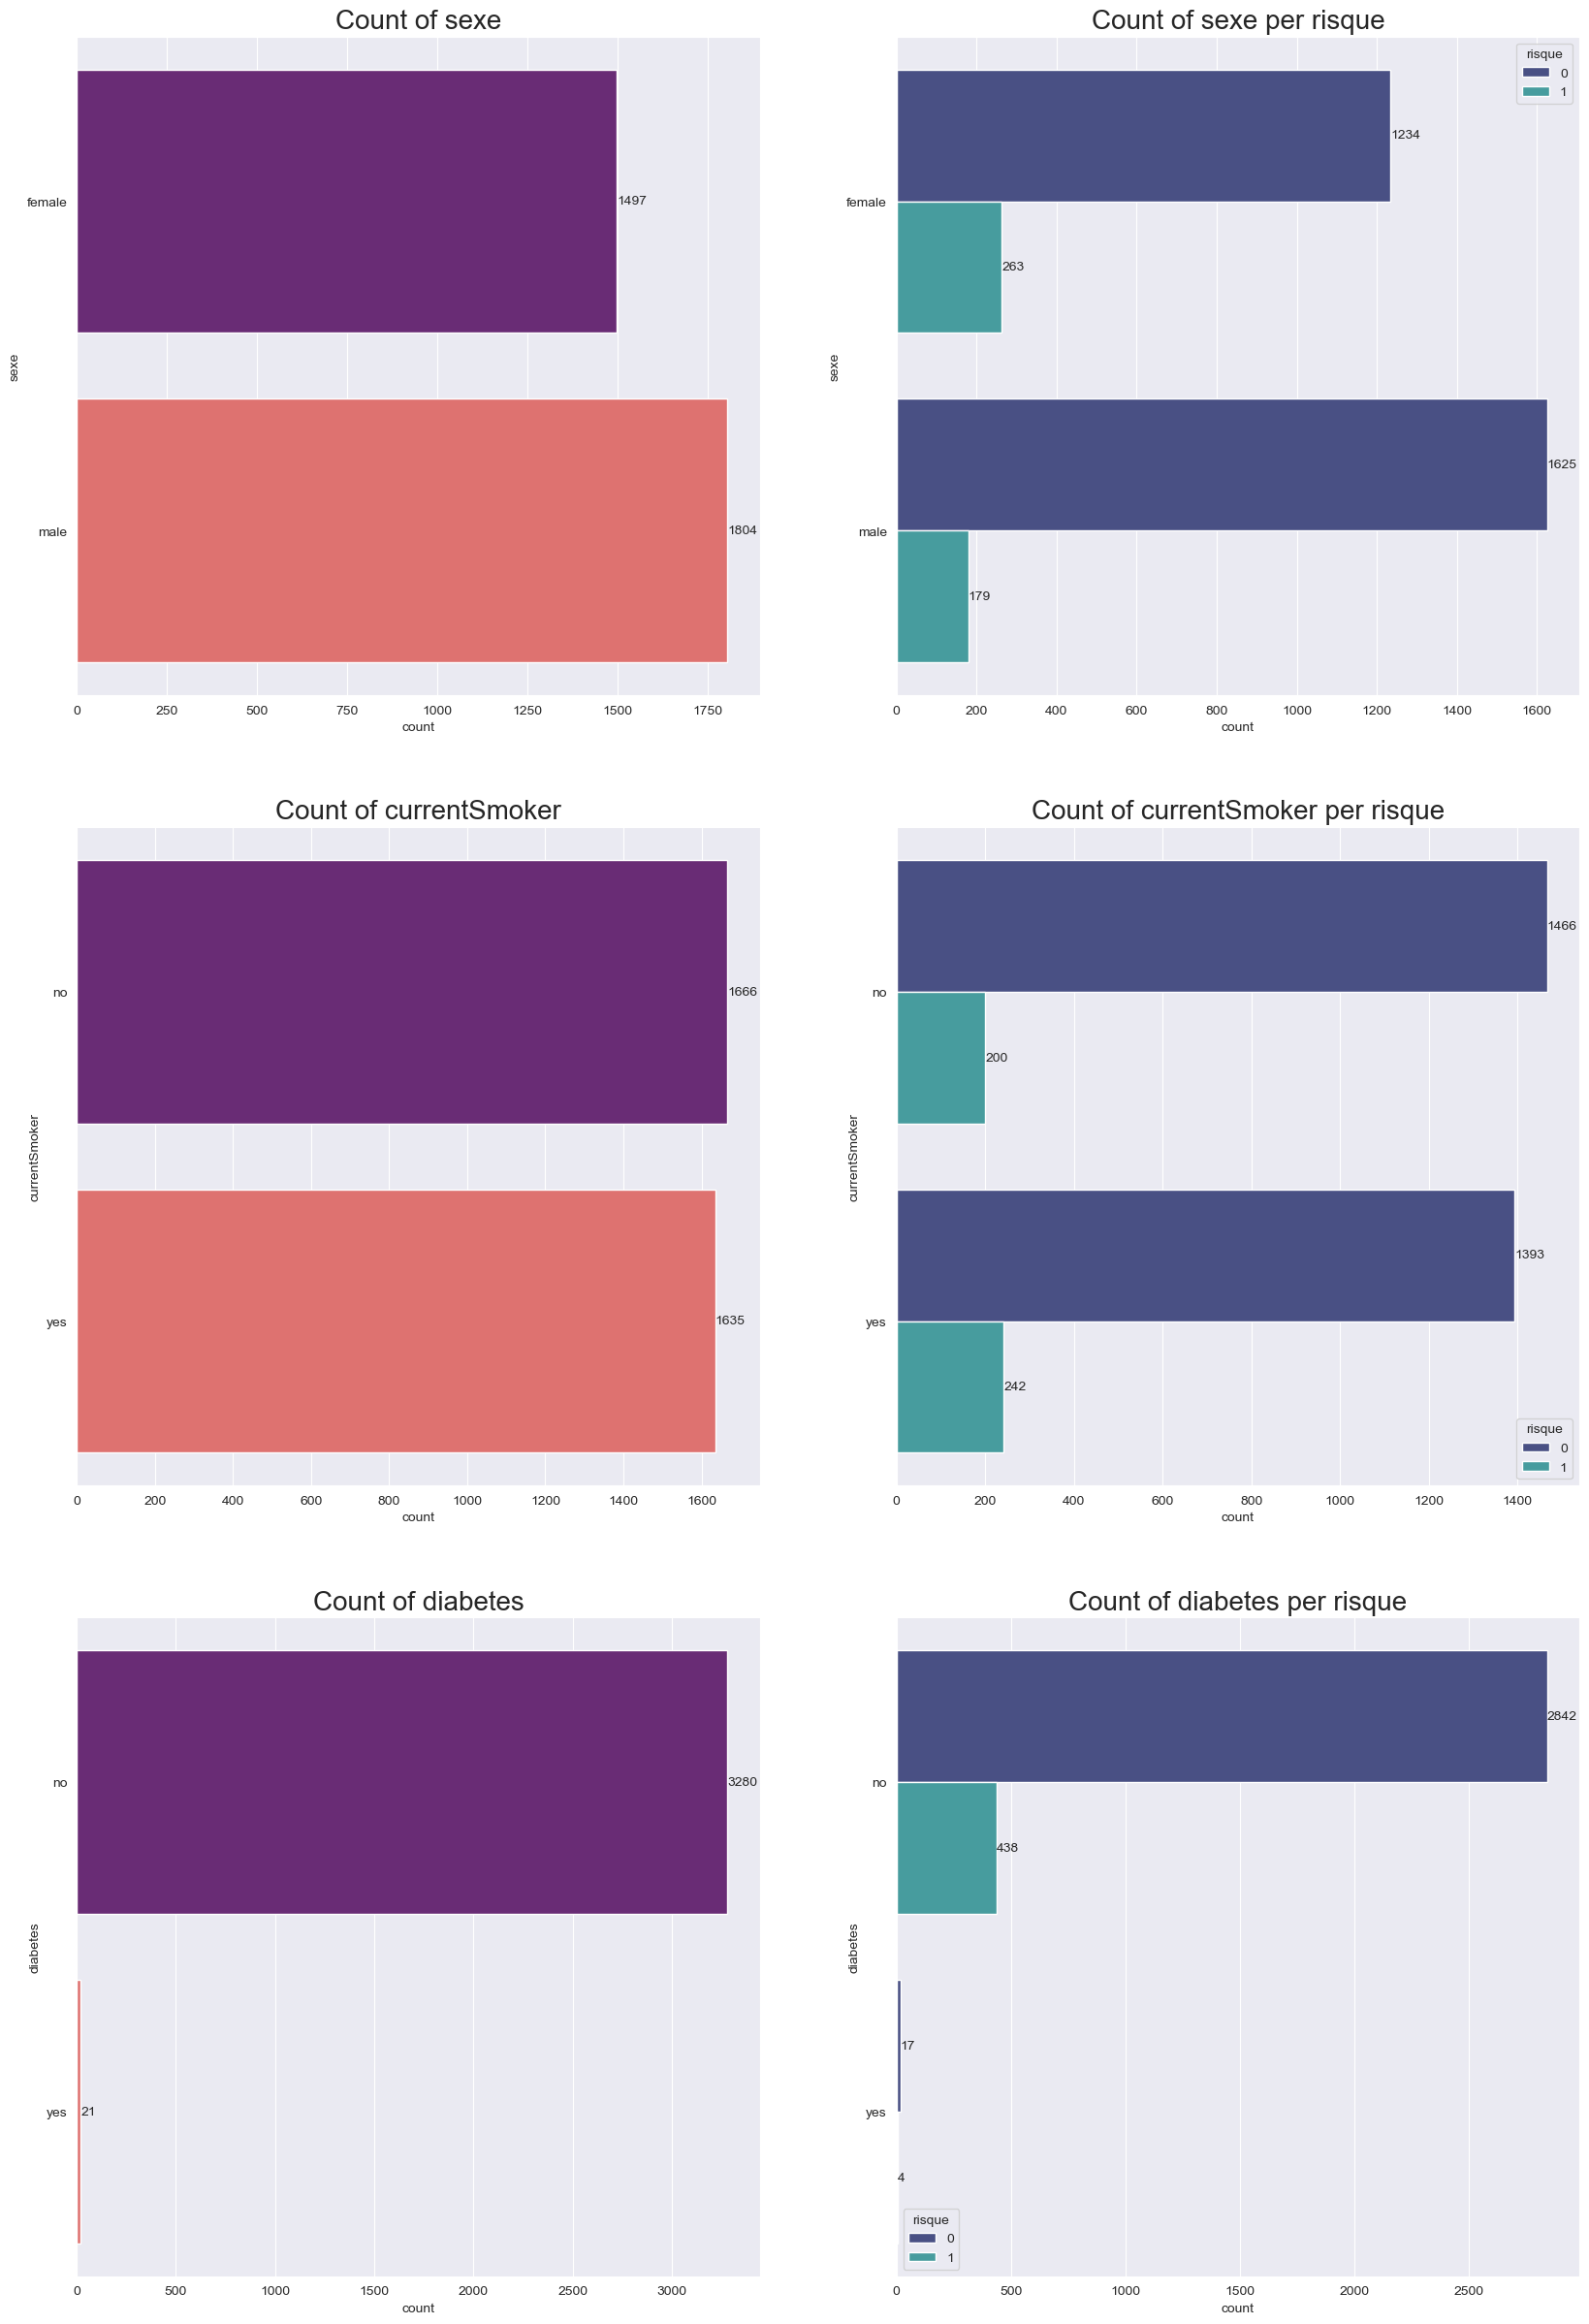

In [56]:
# analyse bivariée entre variables qualitatives et la variable cible


#Diagramme en barre
fig, axes = plt.subplots(3,2, figsize=(20,30))
sns.set_style('darkgrid')
idx = 0
for col in cat_vars:
    sns.countplot(data=df4, y=col, palette='magma', orient='h',
                  ax=axes[idx][0]).set_title(f'Count of {col}', fontsize='20')
    for container in axes[idx][0].containers:
        axes[idx][0].bar_label(container)
    sns.countplot(data=df4, y=col, palette='mako', orient='h',  hue='risque',
                  ax=axes[idx][1]).set_title(f'Count of {col} per risque', fontsize='20')
    for container in axes[idx][1].containers:
        axes[idx][1].bar_label(container)
    idx +=1
plt.show()


On constate qu'il existe une relation entre les variables categorielles et le fait d'avoir ou non un risque de maladie cardiaque, nous allons confirmer cette hypothèse par un test de khi2

#### Test de Chi2 pour confirmer les hypothèses

In [57]:
# test de khi2 pour voir l'association entre les variables categorielle et la var cible
from scipy.stats import chi2_contingency
# le v de cramer ES permet de mesurer l'intensite de la relation, le degre d'association pour le test de chi2)
#ES ≤ 0.2:Le résultat est faible. Bien que le résultat soit statistiquement significatif, les champs ont un lien d'association faible.
#0.2 < ES ≤ 0.6:Le résultat est modéré. Les champs ont un lien d'association modéré.
#ES > 0.6: Le résultat est fort. Les champs ont un lien d'association fort.
 

# Initialiser les listes pour stocker les résultats
var_names = []
chi2_stats = []
p_values = []
association=[]
cramer_vs = []

# Parcourir toutes les variables catégorielles
for var in cat_vars:
    # Calculer le tableau de contingence
    contingency_table = pd.crosstab(df4['risque'], df4[var])
    # Calculer la statistique de test du Chi-deux et la p-valeur
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    # Calculer le coefficient V de Cramer
    n = contingency_table.sum().sum()
    phi2 = chi2/n
    r,k = contingency_table.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rc = r-((r-1)**2)/(n-1)
    kc = k-((k-1)**2)/(n-1)
    cramer_v = np.sqrt(phi2corr/min(rc-1,kc-1))
    # Ajouter les résultats aux listes correspondantes
    var_names.append(var)
    chi2_stats.append(chi2)
    p_values.append(p)
    cramer_vs.append(cramer_v)

# Vérification de la significativité pour chaque p-valeur et stockage dans la liste is_significant
for pval in p_values:
    if pval < 0.05:
        association.append('Oui')
    else:
        association.append('Non')

# Créer un DataFrame avec les résultats
results_df = pd.DataFrame({
    'Variable': var_names,
    'Chi2': chi2_stats,
    'P-valeur': p_values,
    "associations": association,
    'V de Cramer': cramer_vs
})

# Trier le DataFrame par ordre croissant de V de Cramer
results_df.sort_values(by='V de Cramer', inplace=True,ascending=False)

# Afficher le tableau des résultats
print(results_df)

        Variable       Chi2      P-valeur associations  V de Cramer
0           sexe  40.585784  1.881707e-10          Oui     0.109524
1  currentSmoker   5.325735  2.101275e-02          Oui     0.036204
2       diabetes   0.195678  6.582325e-01          Non     0.000000


L'hypothèses est confirmée à part pour la variable "diabetes"

## Encodage

In [58]:
# Sélectionner les variables explicatives et la variable d'intérêt
X=df4.drop('risque',axis=1)
y=df4['risque']

In [59]:
# L'algorithme pour fonctionner a besoin des valeurs chiffrees,Pour faire la regression on doit transformer les variables categorielles 
#en variable binaire
sexe1=pd.get_dummies(X['sexe'],drop_first=True,dtype=int)
currentSmoker1=pd.get_dummies(X['currentSmoker'],drop_first=True,dtype=int)
diabetes1=pd.get_dummies(X['diabetes'],drop_first=True,dtype=int)

In [60]:
# on supprime les variable categorielle et on les remplace par les nouvelles variable
X.drop(['sexe','currentSmoker' ,'diabetes'],axis=1,inplace=True)
X=pd.concat([X,sexe1,currentSmoker1,diabetes1,],axis=1)
X.head()

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose,male,yes,yes
0,39,0.0,195.0,106.0,70.0,26.97,80.0,77.0,0,0,0
1,46,0.0,250.0,121.0,81.0,28.73,95.0,76.0,1,0,0
2,48,20.0,245.0,127.5,80.0,25.34,75.0,70.0,0,1,0
3,61,30.0,225.0,150.0,95.0,28.58,65.0,103.0,1,1,0
4,46,23.0,285.0,130.0,84.0,23.10,85.0,85.0,1,1,0


## Sous echantillonnage de la classe majoritaire unsampling

In [62]:
X1=X
X1['risque'] = y
X1

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose,male,yes,yes,risque
0,39,0.0,195.0,106.0,70.0,26.97,80.0,77.0,0,0,0,0
1,46,0.0,250.0,121.0,81.0,28.73,95.0,76.0,1,0,0,0
2,48,20.0,245.0,127.5,80.0,25.34,75.0,70.0,0,1,0,0
3,61,30.0,225.0,150.0,95.0,28.58,65.0,103.0,1,1,0,1
4,46,23.0,285.0,130.0,84.0,23.10,85.0,85.0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4232,68,0.0,176.0,168.0,97.0,23.14,60.0,79.0,0,0,0,1
4233,50,1.0,313.0,179.0,92.0,25.97,66.0,86.0,0,1,0,1
4234,51,43.0,207.0,126.5,80.0,19.71,65.0,68.0,0,1,0,0
4235,48,20.0,248.0,131.0,72.0,22.00,84.0,86.0,1,1,0,0


In [63]:
#definition des classes minoritaire et majoritaire
minority=X1[X1.risque==1]    #filtrage on met la valeur pour les classe=1
majority=X1[X1.risque==0]

In [64]:
# sous echantillonnage de la classe majoritaire unsampling
from sklearn.utils import resample
majority_upsampled=resample(majority,replace=False,n_samples=len(minority))                                                                    
majority_upsampled

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose,male,yes,yes,risque
3218,42,20.0,225.0,111.0,71.0,23.43,95.0,85.0,1,1,0,0
597,60,0.0,276.0,144.0,78.0,26.98,60.0,88.0,0,0,0,0
2692,36,20.0,177.0,115.0,63.5,22.54,71.0,73.0,1,1,0,0
2092,42,9.0,185.0,123.0,74.0,24.41,83.0,92.0,1,1,0,0
4007,46,0.0,254.0,135.0,100.0,27.86,83.0,75.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3521,59,0.0,190.0,127.0,77.0,28.47,80.0,100.0,0,0,0,0
2546,40,0.0,178.0,119.0,78.5,23.28,72.0,75.0,1,0,0,0
2124,62,5.0,254.0,167.5,102.5,27.15,75.0,83.0,1,1,0,0
725,40,0.0,251.0,135.0,87.0,31.60,75.0,80.0,1,0,0,0


In [65]:
#concatenation des deux variable
df_upsampled=pd.concat([majority_upsampled,minority])
df_upsampled

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose,male,yes,yes,risque
3218,42,20.0,225.0,111.0,71.0,23.43,95.0,85.0,1,1,0,0
597,60,0.0,276.0,144.0,78.0,26.98,60.0,88.0,0,0,0,0
2692,36,20.0,177.0,115.0,63.5,22.54,71.0,73.0,1,1,0,0
2092,42,9.0,185.0,123.0,74.0,24.41,83.0,92.0,1,1,0,0
4007,46,0.0,254.0,135.0,100.0,27.86,83.0,75.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4221,50,0.0,260.0,119.0,74.0,21.85,80.0,72.0,0,0,0,1
4223,56,0.0,287.0,149.0,98.0,21.68,90.0,75.0,0,0,0,1
4226,58,0.0,233.0,125.5,84.0,26.05,67.0,76.0,0,0,0,1
4232,68,0.0,176.0,168.0,97.0,23.14,60.0,79.0,0,0,0,1


In [66]:
# Verification
df_upsampled['risque'].value_counts(normalize=True)

risque
0    0.5
1    0.5
Name: proportion, dtype: float64

Les deux classes sont bien équilibrées

## Separation en base de train et test (Data and Target Split)

In [67]:
# preparation des donnees en train et test x toutes les variables de bdd et y la colonne risque
from sklearn.model_selection import train_test_split

X2=df_upsampled.drop(['risque'],axis=1)
y2=df_upsampled['risque']
X_train2,X_test2,y_train2,y_test2=train_test_split(X2,y2,test_size=0.3,random_state=101)

In [68]:
print(X_train2)

      age  cigsPerDay  totChol  sysBP  diaBP    BMI  heartRate  glucose  male  \
571    50         0.0    230.0  133.0   91.0  25.74       72.0     70.0     0   
1248   49         9.0    266.0  159.0   88.0  20.66       76.0     84.0     1   
310    47         0.0    250.0  114.0   77.0  24.16       80.0     93.0     1   
1553   67        15.0    285.0  155.0   90.0  30.42       70.0     77.0     0   
1888   63        30.0    225.0  146.0   82.0  27.17       70.0     85.0     0   
...   ...         ...      ...    ...    ...    ...        ...      ...   ...   
1095   51        20.0    219.0  125.0   71.0  21.19       77.0     75.0     0   
3835   62         0.0    266.0  124.0   69.0  22.90       66.0     82.0     1   
1852   50         0.0    229.0  105.0   72.5  26.25       90.0     79.0     1   
663    59        20.0    206.0  167.0   89.5  25.83       72.0     75.0     1   
4111   61         0.0    257.0  141.0   80.0  33.90       85.0     60.0     1   

      yes  yes  
571     0 

In [69]:
# contruction du modele de regression logistique
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression(solver='liblinear')

# Entrainement du modele(lors de l'entrainement l'algorithme calcul les differente θ du modele)
logmodel.fit(X_train2,y_train2)

LogisticRegression(solver='liblinear')

In [70]:
# Prediction et evaluation de l'algo
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score
# Évaluation des performances sur l'ensemble d'entrainement
y_pred_train2 = logmodel.predict(X_train2)
train_classification = classification_report(y_train2, y_pred_train2)
print("Performance sur la base d'entrainement")
print('accuracy score train:',accuracy_score(y_train2,y_pred_train2))
print('Train Classification report : \n', train_classification)

# Évaluation des performances sur l'ensemble test
y_pred2=logmodel.predict(X_test2)
test_classification = classification_report(y_test2,y_pred2)

print("Performance sur la base de test")
print('accuracy score test:',accuracy_score(y_test2,y_pred2))
print('Test Classification report : \n', test_classification)


Performance sur la base d'entrainement
accuracy score train: 0.6893203883495146
Train Classification report : 
               precision    recall  f1-score   support

           0       0.69      0.69      0.69       306
           1       0.69      0.69      0.69       312

    accuracy                           0.69       618
   macro avg       0.69      0.69      0.69       618
weighted avg       0.69      0.69      0.69       618

Performance sur la base de test
accuracy score test: 0.6804511278195489
Test Classification report : 
               precision    recall  f1-score   support

           0       0.67      0.74      0.70       136
           1       0.69      0.62      0.66       130

    accuracy                           0.68       266
   macro avg       0.68      0.68      0.68       266
weighted avg       0.68      0.68      0.68       266



Sur la base test Nous avons un accuracy de 68%, le modele a une performance de 68%,ce qui veut le modèle fait une bonne prediction dans 68% des cas.

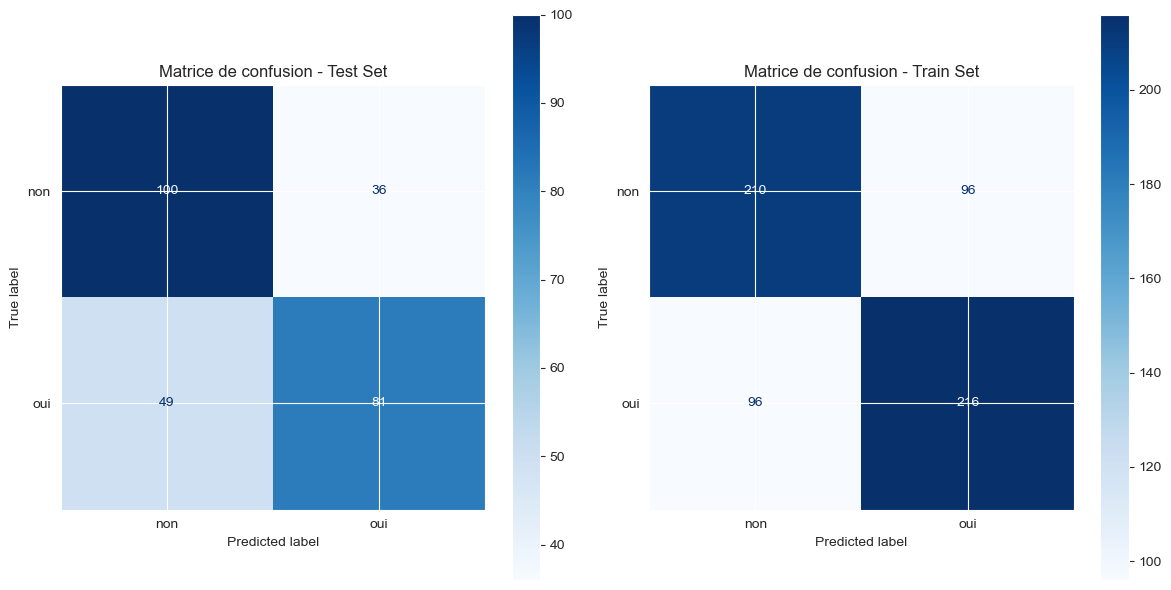

In [71]:
# Matrice de confusion
from sklearn.metrics import confusion_matrix
matrice_confusion=confusion_matrix(y_test2,y_pred2)
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=matrice_confusion,display_labels=['non','oui'])

matrice_confusion_train=confusion_matrix(y_train2,y_pred_train2)
cm_display_train=metrics.ConfusionMatrixDisplay(confusion_matrix=matrice_confusion_train,display_labels=['non','oui'])


# Création de la figure et des axes
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 ligne, 2 colonnes

# Matrice de confusion pour le jeu de test
cm_display.plot(cmap='Blues', values_format='d', ax=axes[0])  # Utilisez le colormap 'Blues' ou ajustez selon votre préférence
axes[0].set_title('Matrice de confusion - Test Set')

# Matrice de confusion pour le jeu d'entraînement
cm_display_train.plot(cmap='Blues', values_format='d', ax=axes[1])
axes[1].set_title('Matrice de confusion - Train Set')

# Ajustements de la mise en page
plt.tight_layout()

# Affichage de la figure
plt.show()


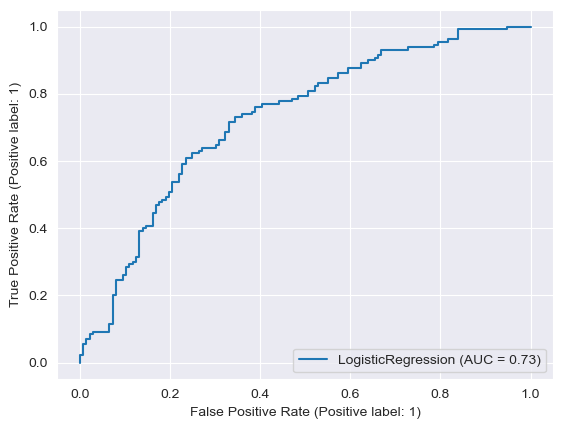

In [72]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt


# Courbe ROC
RocCurveDisplay.from_estimator(logmodel, X_test2, y_test2)
plt.show()

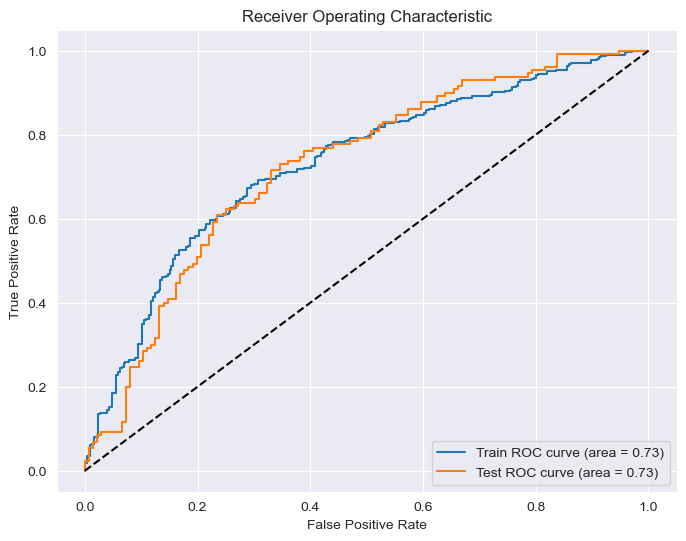

In [73]:
from sklearn.metrics import roc_curve, auc

# Obtenir les scores de probabilité pour les classes positives
y_train_prob2 = logmodel.predict_proba(X_train2)[:, 1]
y_test_prob2 = logmodel.predict_proba(X_test2)[:, 1]

# Calculer les taux de faux positifs (FPR) et les taux de vrais positifs (TPR)
train_fpr, train_tpr, _ = roc_curve(y_train2, y_train_prob2)
test_fpr, test_tpr, _ = roc_curve(y_test2, y_test_prob2)

# Calculer les scores AUC
train_auc = auc(train_fpr, train_tpr)
test_auc = auc(test_fpr, test_tpr)

# Tracer les courbes ROC
plt.figure(figsize=(8, 6))
plt.plot(train_fpr, train_tpr, label='Train ROC curve (area = %0.2f)' % train_auc)
plt.plot(test_fpr, test_tpr, label='Test ROC curve (area = %0.2f)' % test_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

Nous avons un AUC de 73% ce qui veut dire que le modele est capable de predire dans 73% des cas si le patient a le risque de maladie cardiaque

## Utilisation du modele

In [76]:
def reg_logistic():
    nage = input("Entrez l'age du patient:\n>>>")
    ncigsPerDay = input("Combien de cigarette le patient fume par jour?\n>>>")
    ntotChol = input("Quel est le taux de cholesterol du patient?\n>>>")
    nsysBP = input("Quelle est la tension arterielle du patient?\n>>>")
    ndiaBP = input("Quelle est la pression arterielle du patient?\n>>>")
    nBMI = input("Quel est l'indice de la masse corporelle du patient?\n>>>")
    nheartRate = input("Quelle est la frequence cardiaque du patient?\n>>>")
    nglucose = input("Quelle est le taux de glucose du patient?\n>>>")
    nmale = input("Le patient est-il un homme?\n>>>")
    nyes_currentSmoker = input("Est ce que le patient fume actuellement?\n>>>")
    nyes_diabetes = input("Le patient a-t-il le diabete?\n>>>")
    liste=[[nage,ncigsPerDay,ntotChol,nsysBP,ndiaBP,nBMI,nheartRate,nglucose,nmale,nyes_currentSmoker,nyes_diabetes]]
    ndata=pd.DataFrame(liste,columns=['age','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose',
                                      'male','yes','yes'])
    New_predit = logmodel.predict(ndata)
    #print('Ce passager de classe', nclasse, 'à', survive_predit)
    print('Le patient de', nage ,'ans',end=" "); print("n'a pas de risque de maladie cardiaque" if New_predit==0 else 'a un risque de maladie cardiaque')
    #print("et le salaire pour", end=" ");print(liste[1], end=" ");print("ans d'experience égal à",round(prix_predit[1], 3))
reg_logistic()



Entrez l'age du patient:
>>>42
Combien de cigarette le patient fume par jour?
>>>20
Quel est le taux de cholesterol du patient?
>>>225
Quelle est la tension arterielle du patient?
>>>111
Quelle est la pression arterielle du patient?
>>>71
Quel est l'indice de la masse corporelle du patient?
>>>24
Quelle est la frequence cardiaque du patient?
>>>95
Quelle est le taux de glucose du patient?
>>>85
Le patient est-il un homme?
>>>1
Est ce que le patient fume actuellement?
>>>1
Le patient a-t-il le diabete?
>>>0
Le patient de 42 ans n'a pas de risque de maladie cardiaque
